# Quick start: initializing, adding data, runing and saving your PyWGCNA

First, make sure to [install PyWGCNA](https://github.com/mortazavilab/PyWGCNA#readme).

I encourage you to look at [Data input, cleaning and pre-processing tutorial](Data%20format.md) before running PyWGCNA.

Then, download the example data from [here](https://github.com/mortazavilab/PyWGCNA/raw/main/tutorials/5xFAD_paper.zip) and decompress it.

For this tutorial, we will be using the gene expression matrix of 5xFAD mouse from the [MODEL-AD](https://www.model-ad.org/) project and [this paper](https://www.nature.com/articles/s41597-021-01054-y) in Scientific Data which has 5548 genes and 193 samples in four different time points.

## Setting up the PyWGCNA object

We use the TPM matrix to create a PyWGCNA object. The object serves as a container that contains expression data (i.e. TPM) and analysis results (like clustering, or visualizations) for an RNA-seq dataset. For a technical discussion of the PyWGCNA object structure, check out our [GitHub Wiki](https://github.com/mortazavilab/PyWGCNA/wiki). For example, the raw TPM matrix is stored in `GeneExp` class as an AnnData.

## **Note**

Depending on the amount of RAM on your machine, you may get an error during calculation of the TOM similarity matrix. In order to solve this problem, we suggest to remove one or two samples from each category or use another machine with more RAM.

**Compatible with PyWGCNA 2.0.0**

In [1]:
import PyWGCNA

geneExp = 'Emile/expression_data.csv'

pyWGCNA_SCD = PyWGCNA.WGCNA(name='SCD', 
                              species='human', 
                              geneExpPath=geneExp, 
                              outputPath='',
                              minModuleSize=10,
                              save=True)
pyWGCNA_SCD.geneExpr.to_df().head(5)

Saving data to be True, checking requirements ...


,ENSG00000001167,ENSG00000001630,ENSG00000003400,ENSG00000005238,ENSG00000005812,ENSG00000005882,ENSG00000005893,ENSG00000006831,ENSG00000007541,ENSG00000007968,...,ENSG00000291142,ENSG00000291275,ENSG00000292344,ENSG00000293164,ENSG00000293241,ENSG00000293313,ENSG00000293348,ENSG00000293451,ENSG00000293505,ENSG00000293526
sample_id,,,,,,,,,,,,,,,,,,,,,
K43-916V6_S16,0.000000,0.0,0.0,9532.908976,0.000000,362.254909,0.000000,0.000000,0.000000,17394.326529,...,0.000000,0.0,193.287898,0.000000,514.010124,0.000000,0.0,0.0,330.075901,0.0
K43-923V6_S18,0.000000,0.0,0.0,2477.692514,136.234937,827.773919,32.469411,0.000000,0.000000,12902.872951,...,192.240494,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
K43-466V7_S22,0.000000,0.0,0.0,2191.778552,0.000000,0.000000,0.000000,0.000000,0.000000,10428.455488,...,0.000000,0.0,0.000000,855.313948,0.000000,0.000000,0.0,0.0,772.747204,0.0
K43-882V6_S24,0.000000,0.0,0.0,6228.214675,258.182014,86.683643,0.000000,24.527000,276.297051,23854.688481,...,168.636856,0.0,0.000000,86.933288,475.464140,22.270397,0.0,0.0,0.000000,0.0
K43-881V6_S20,17.127137,0.0,0.0,3237.953301,158.814534,35.428534,12.011534,60.525656,74.618573,17563.218373,...,36.326873,0.0,0.000000,0.000000,189.710967,22.628714,0.0,0.0,0.000000,0.0


## Pre-processing workflow

PyWGCNA allows you to easily preproces the data including removing genes with too many missing values or lowly-expressed genes across samples (by default we suggest to remove genes without that are expressed below 1 TPM) and removing samples with too many missing values. Keep in your mind that these options can be adjusted by changing `TPMcutoff` and `cut`

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



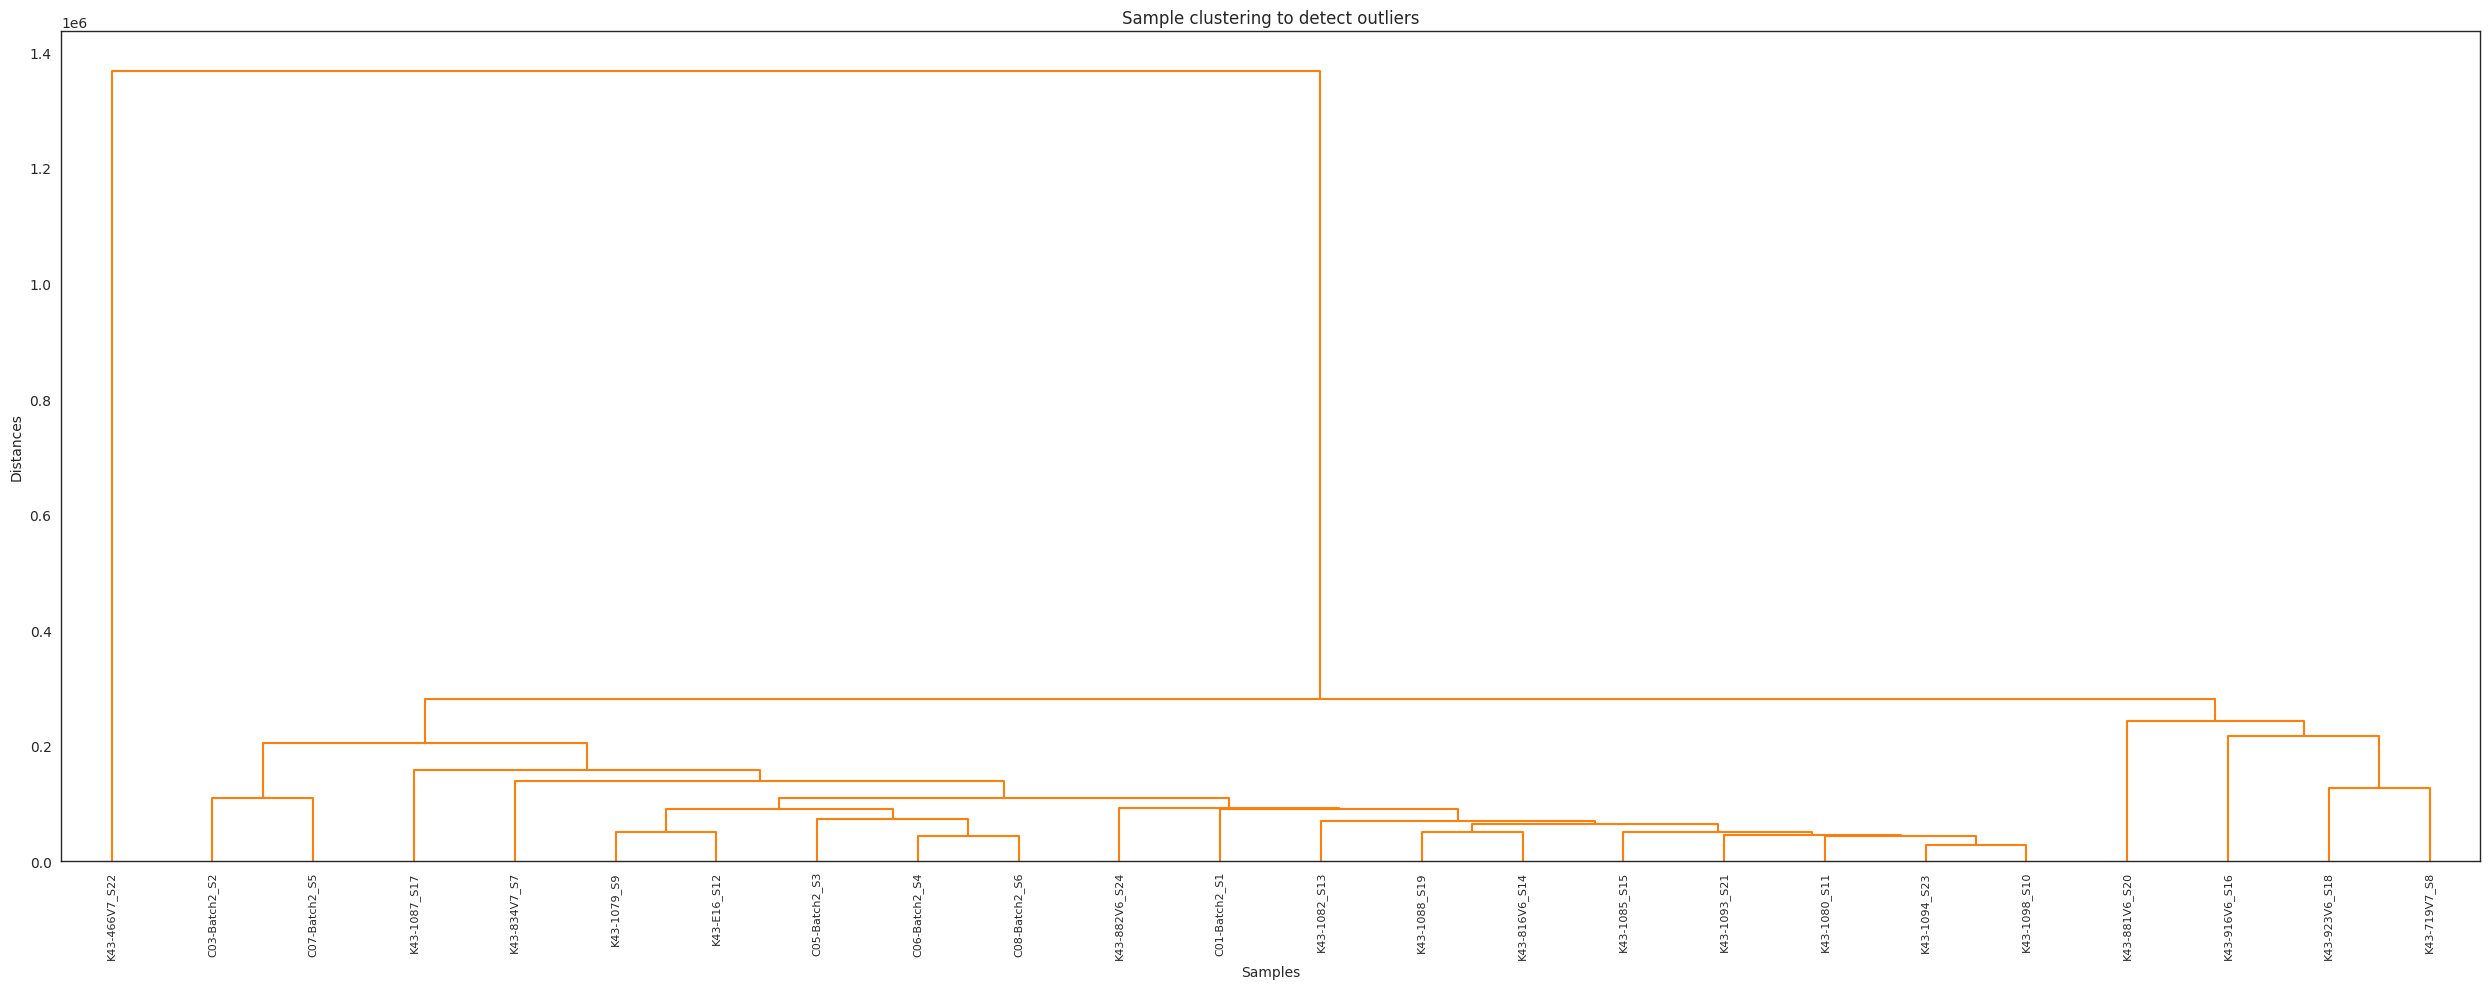

In [2]:
pyWGCNA_SCD.preprocess()

## Construction of the gene network and identification of modules

PyWGCNA compresses all the steps of network construction and module detection in one function called `findModules` which performs the following steps:
1. Choosing the soft-thresholding power: analysis of network topology
2. Co-expression similarity and adjacency
3. Topological Overlap Matrix (TOM)
4. Clustering using TOM
5. Merging of modules whose expression profiles are very similar

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  993
    Power  SFT.R.sq     slope truncated R.sq     mean(k)   median(k)  \
0       1  0.116327  0.323714      -0.112682  236.148184  260.958727   
1       2  0.001542 -0.039555       0.634134  122.066359  121.396809   
2       3  0.155154 -0.415878       0.742846   72.354097   74.680897   
3       4  0.283187 -0.569525       0.730513   47.142977    45.02671   
4       5  0.564013 -0.477099       0.678169   33.004459   27.490828   
5       6  0.690246 -0.937623       0.661316   24.466255    19.08331   
6       7  0.660729 -1.271305       0.574866   19.003225   12.879653   
7       8  0.648882 -1.405249       0.551511   15.339938    8.797193   
8       9  0.633824  -1.48299       0.556613   12.785508     6.36606   
9      10  0.639862 -1.472844       0.603457   10.944002    4.693432   
10     11  0.626011 -1.437372       0.632687    9.577674    3.523981   
11     13  0.617868 -1.359029     

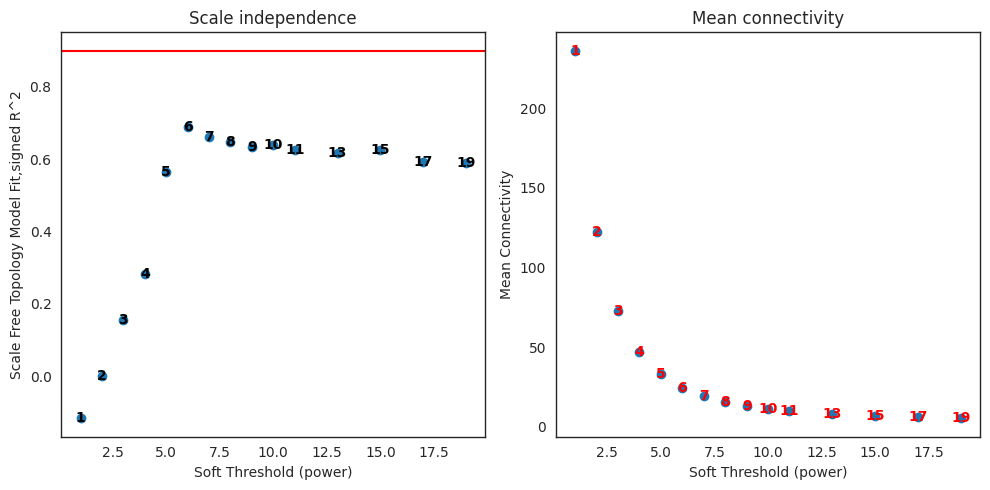

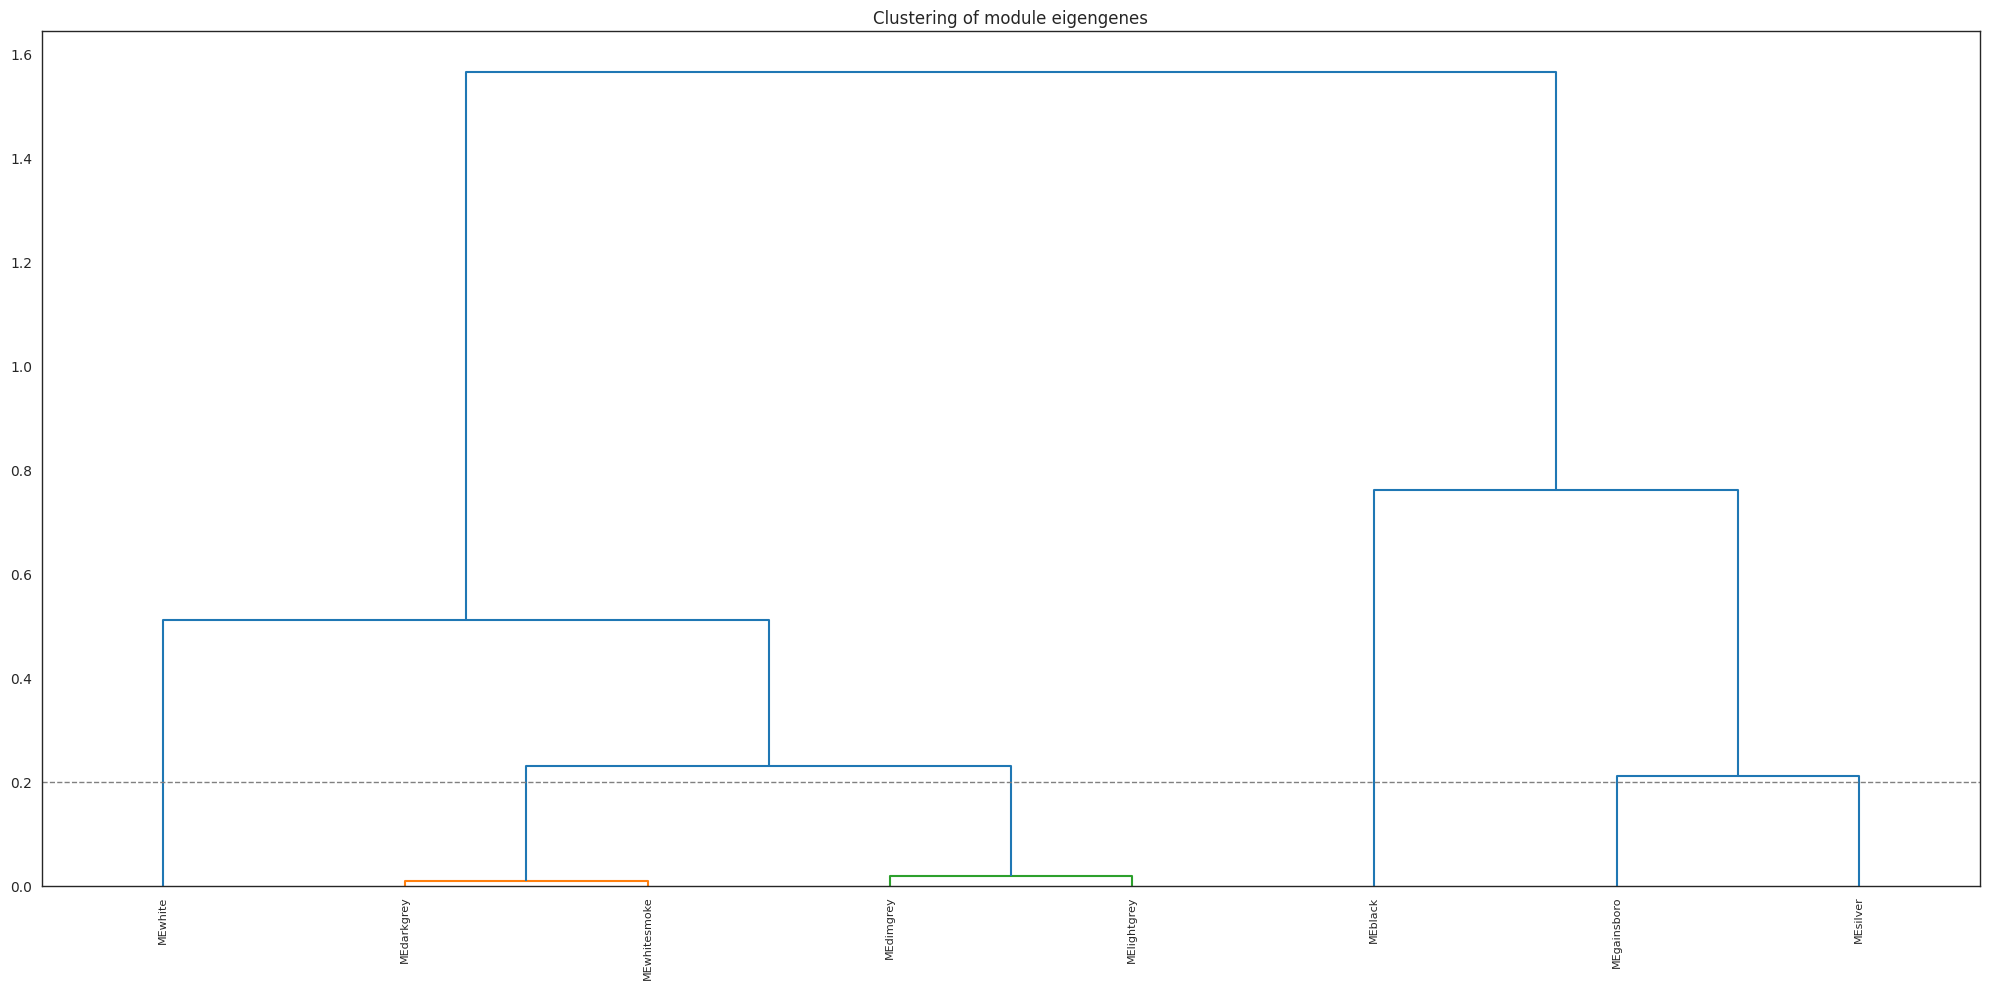

In [3]:
pyWGCNA_SCD.findModules()

We also can merge two previous steps by calling `runWGCNA()` function.

### Updating sample information and assiging color to them for dowstream analysis

In [4]:
pyWGCNA_SCD.updateSampleInfo(path='Emile/Phenotype.csv', sep=',')

# add color for metadata
pyWGCNA_SCD.setMetadataColor('Sex', {'Female': 'green',
                                       'Male': 'yellow'})
pyWGCNA_SCD.setMetadataColor('Genotype', {'AA': 'darkviolet',
                                            'FA': 'deeppink'})
pyWGCNA_SCD.setMetadataColor('Age', {'1mon': 'thistle',
                                       '18mon': 'purple'})
pyWGCNA_SCD.setMetadataColor('Conditions', {'WholeBlood': 'red',
                                          'CordBlood': 'blue'})

### Updating gene information

espcially adding gene name for doing downstream analysis

In [5]:
geneList = PyWGCNA.getGeneList(dataset='hsapiens_gene_ensembl',
                               attributes=['ensembl_gene_id', 
                                           'external_gene_name', 
                                           'gene_biotype'],
                               maps=['gene_id', 'gene_name', 'gene_biotype'])


pyWGCNA_SCD.updateGeneInfo(geneList)

**note**: For doing downstream analysis, we keep aside the Gray modules which is the collection of genes that could not be assigned to any other module.

## Relating modules to external information and identifying important genes
PyWGCNA gather some important analysis after identifying modules in `analyseWGCNA()` function including:

1. Quantifying module–trait relationship 
2. Gene relationship to trait and modules
3. Gene-ontology analysis

Keep in your mind before you start analysis to add any sample or gene information.

For showing module relationship heatmap, PyWGCNA needs user to choose and set colors from [Matplotlib colors](https://matplotlib.org/stable/gallery/color/named_colors.html) for metadata by using `setMetadataColor()` function.

You also can select which data trait in which order you wish to show in module eigengene heatmap

Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

plotting module heatmap eigengene...
	Done..

plotting module barplot eigengene...
	Done..

doing Enrichr GO analysis for each module...
GO directory does not exist!
Creating GO directory!
	Done..



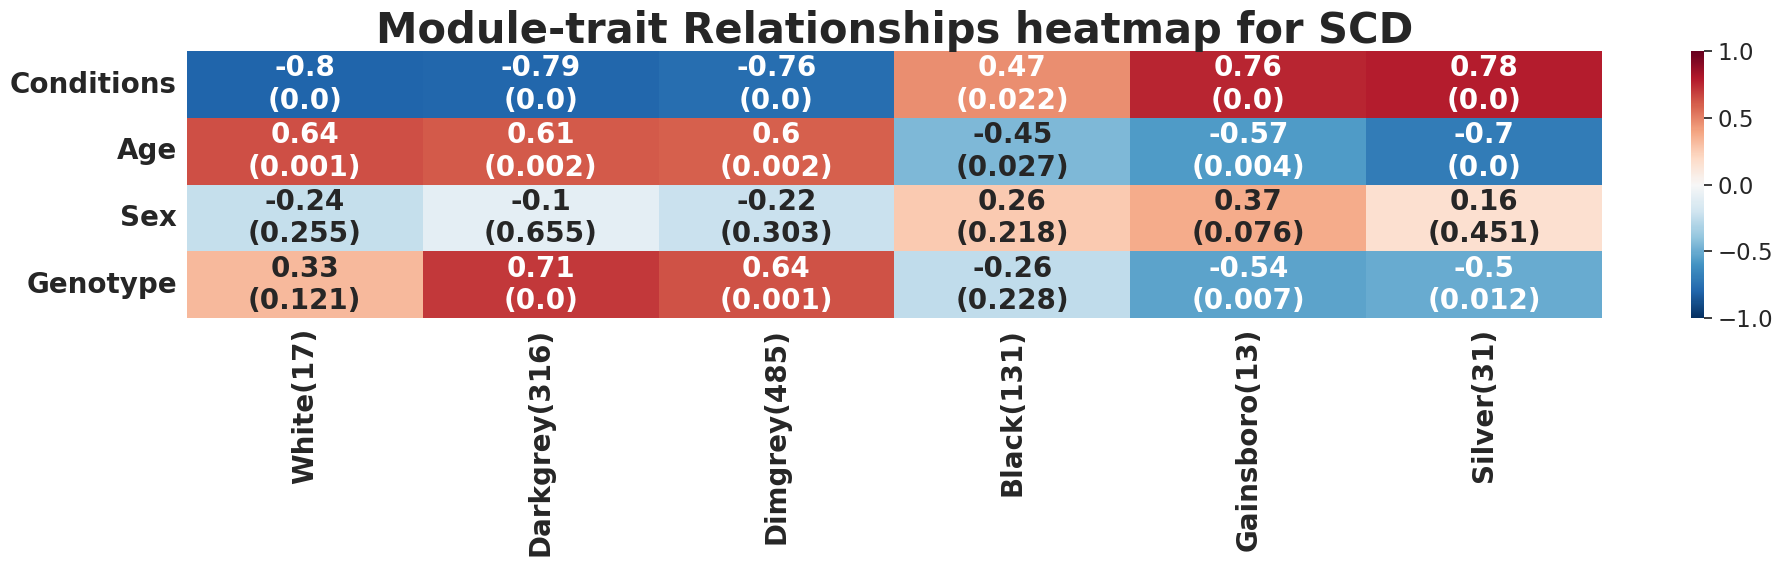

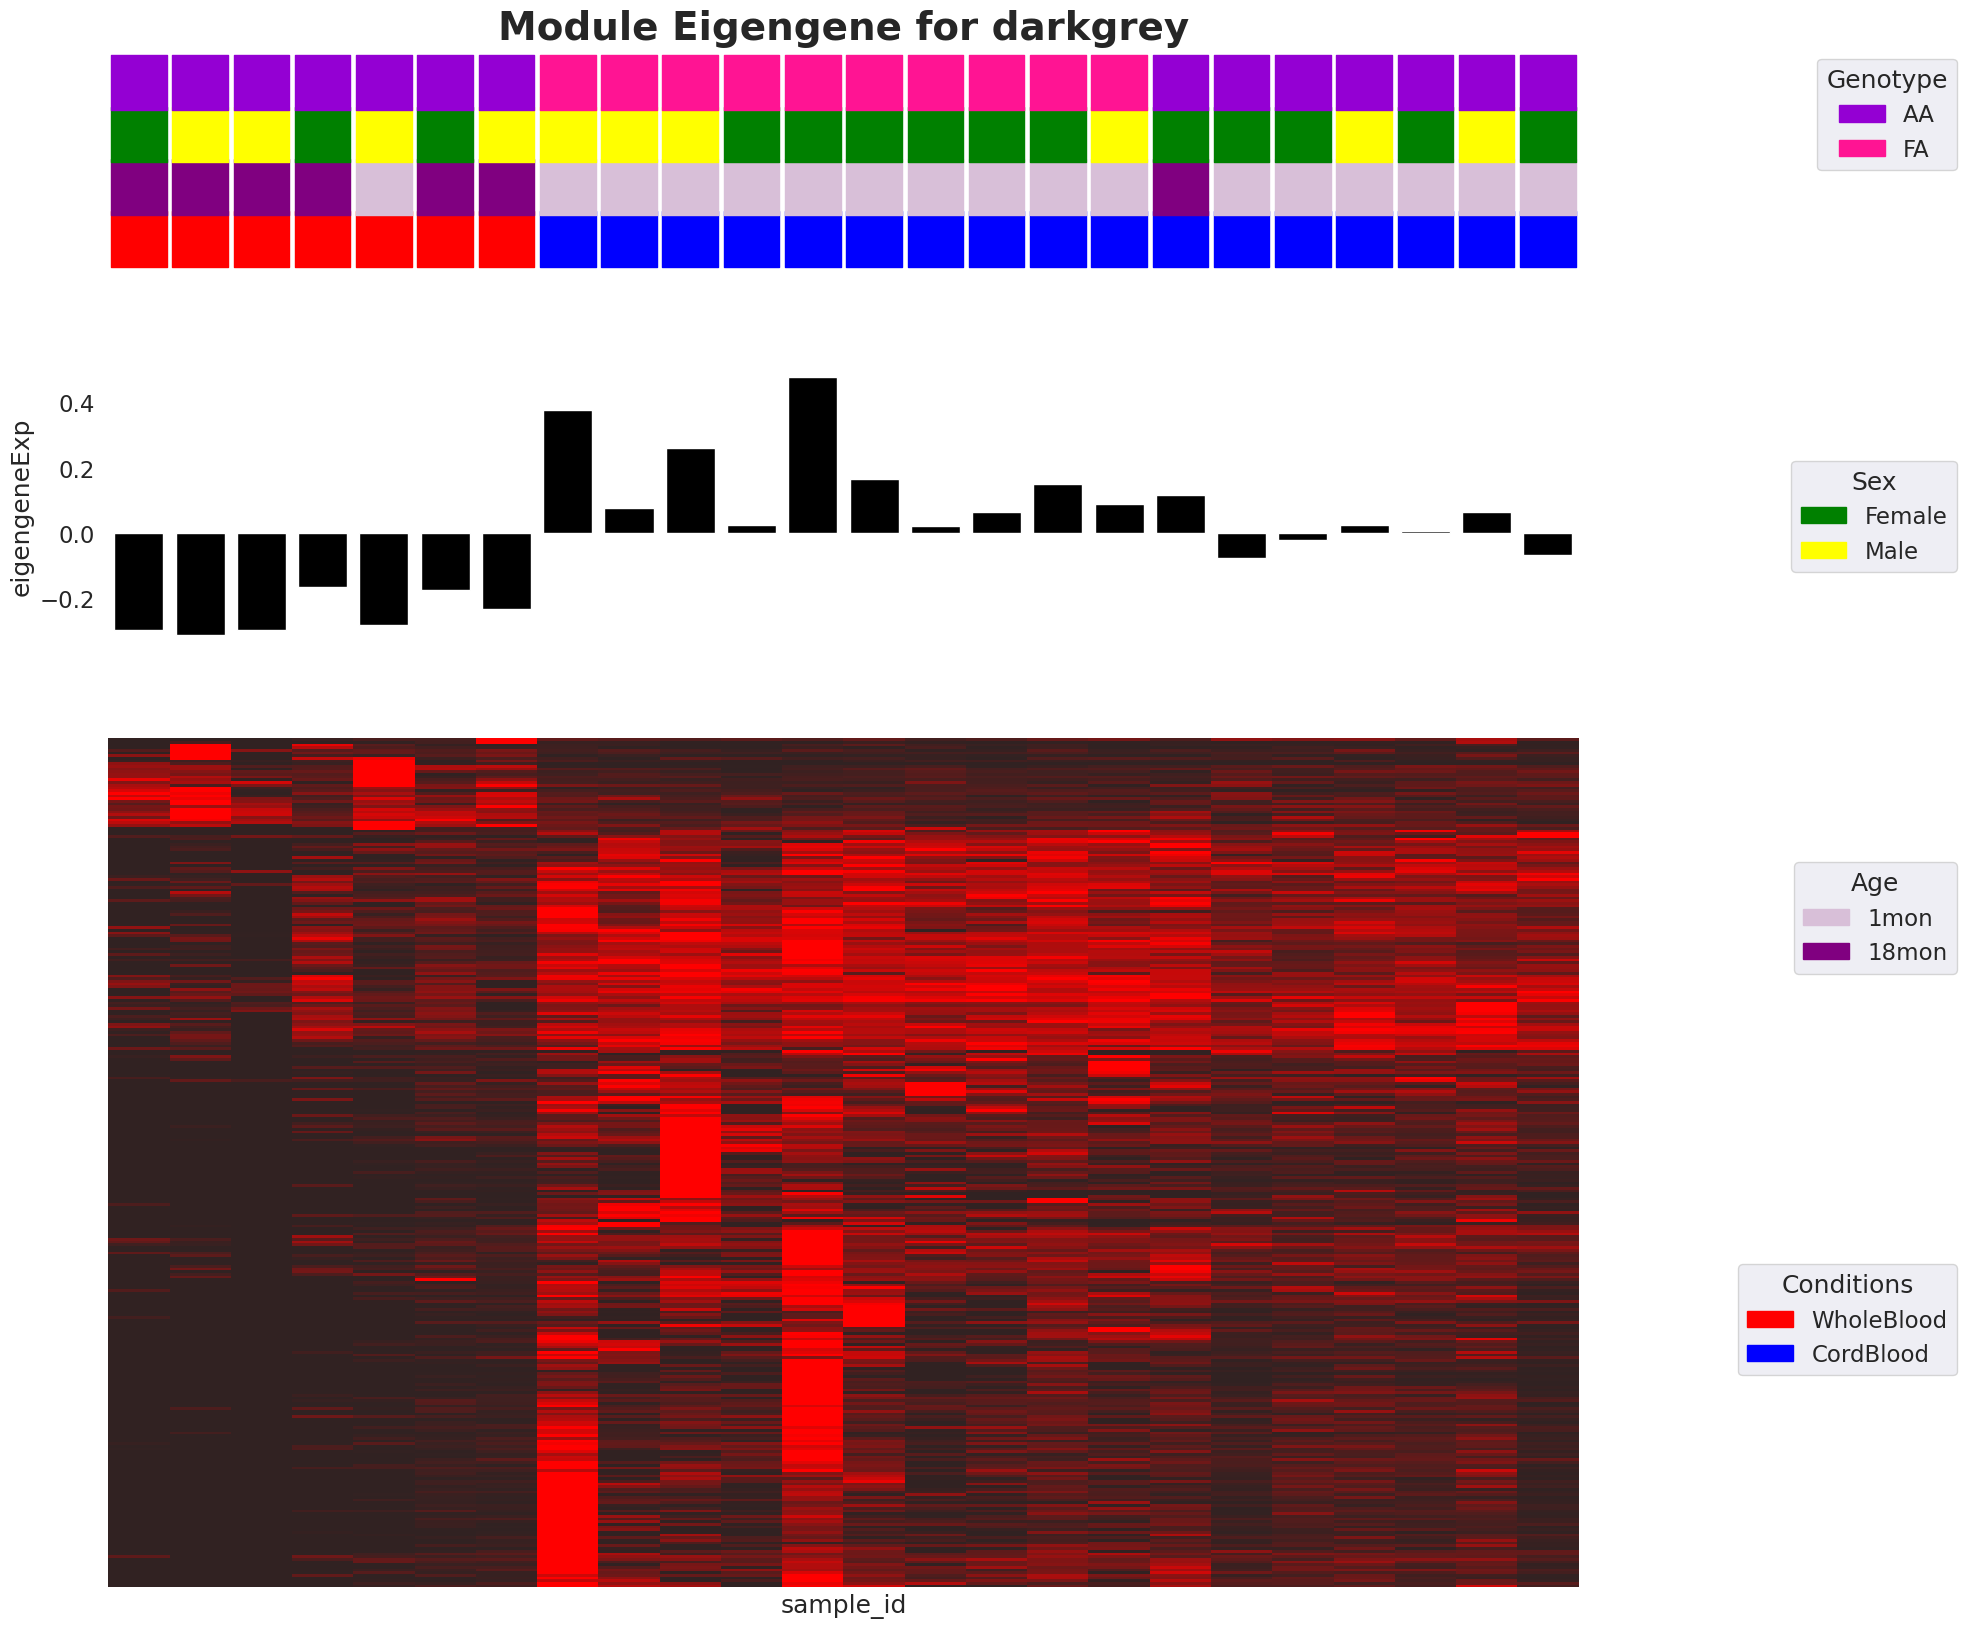

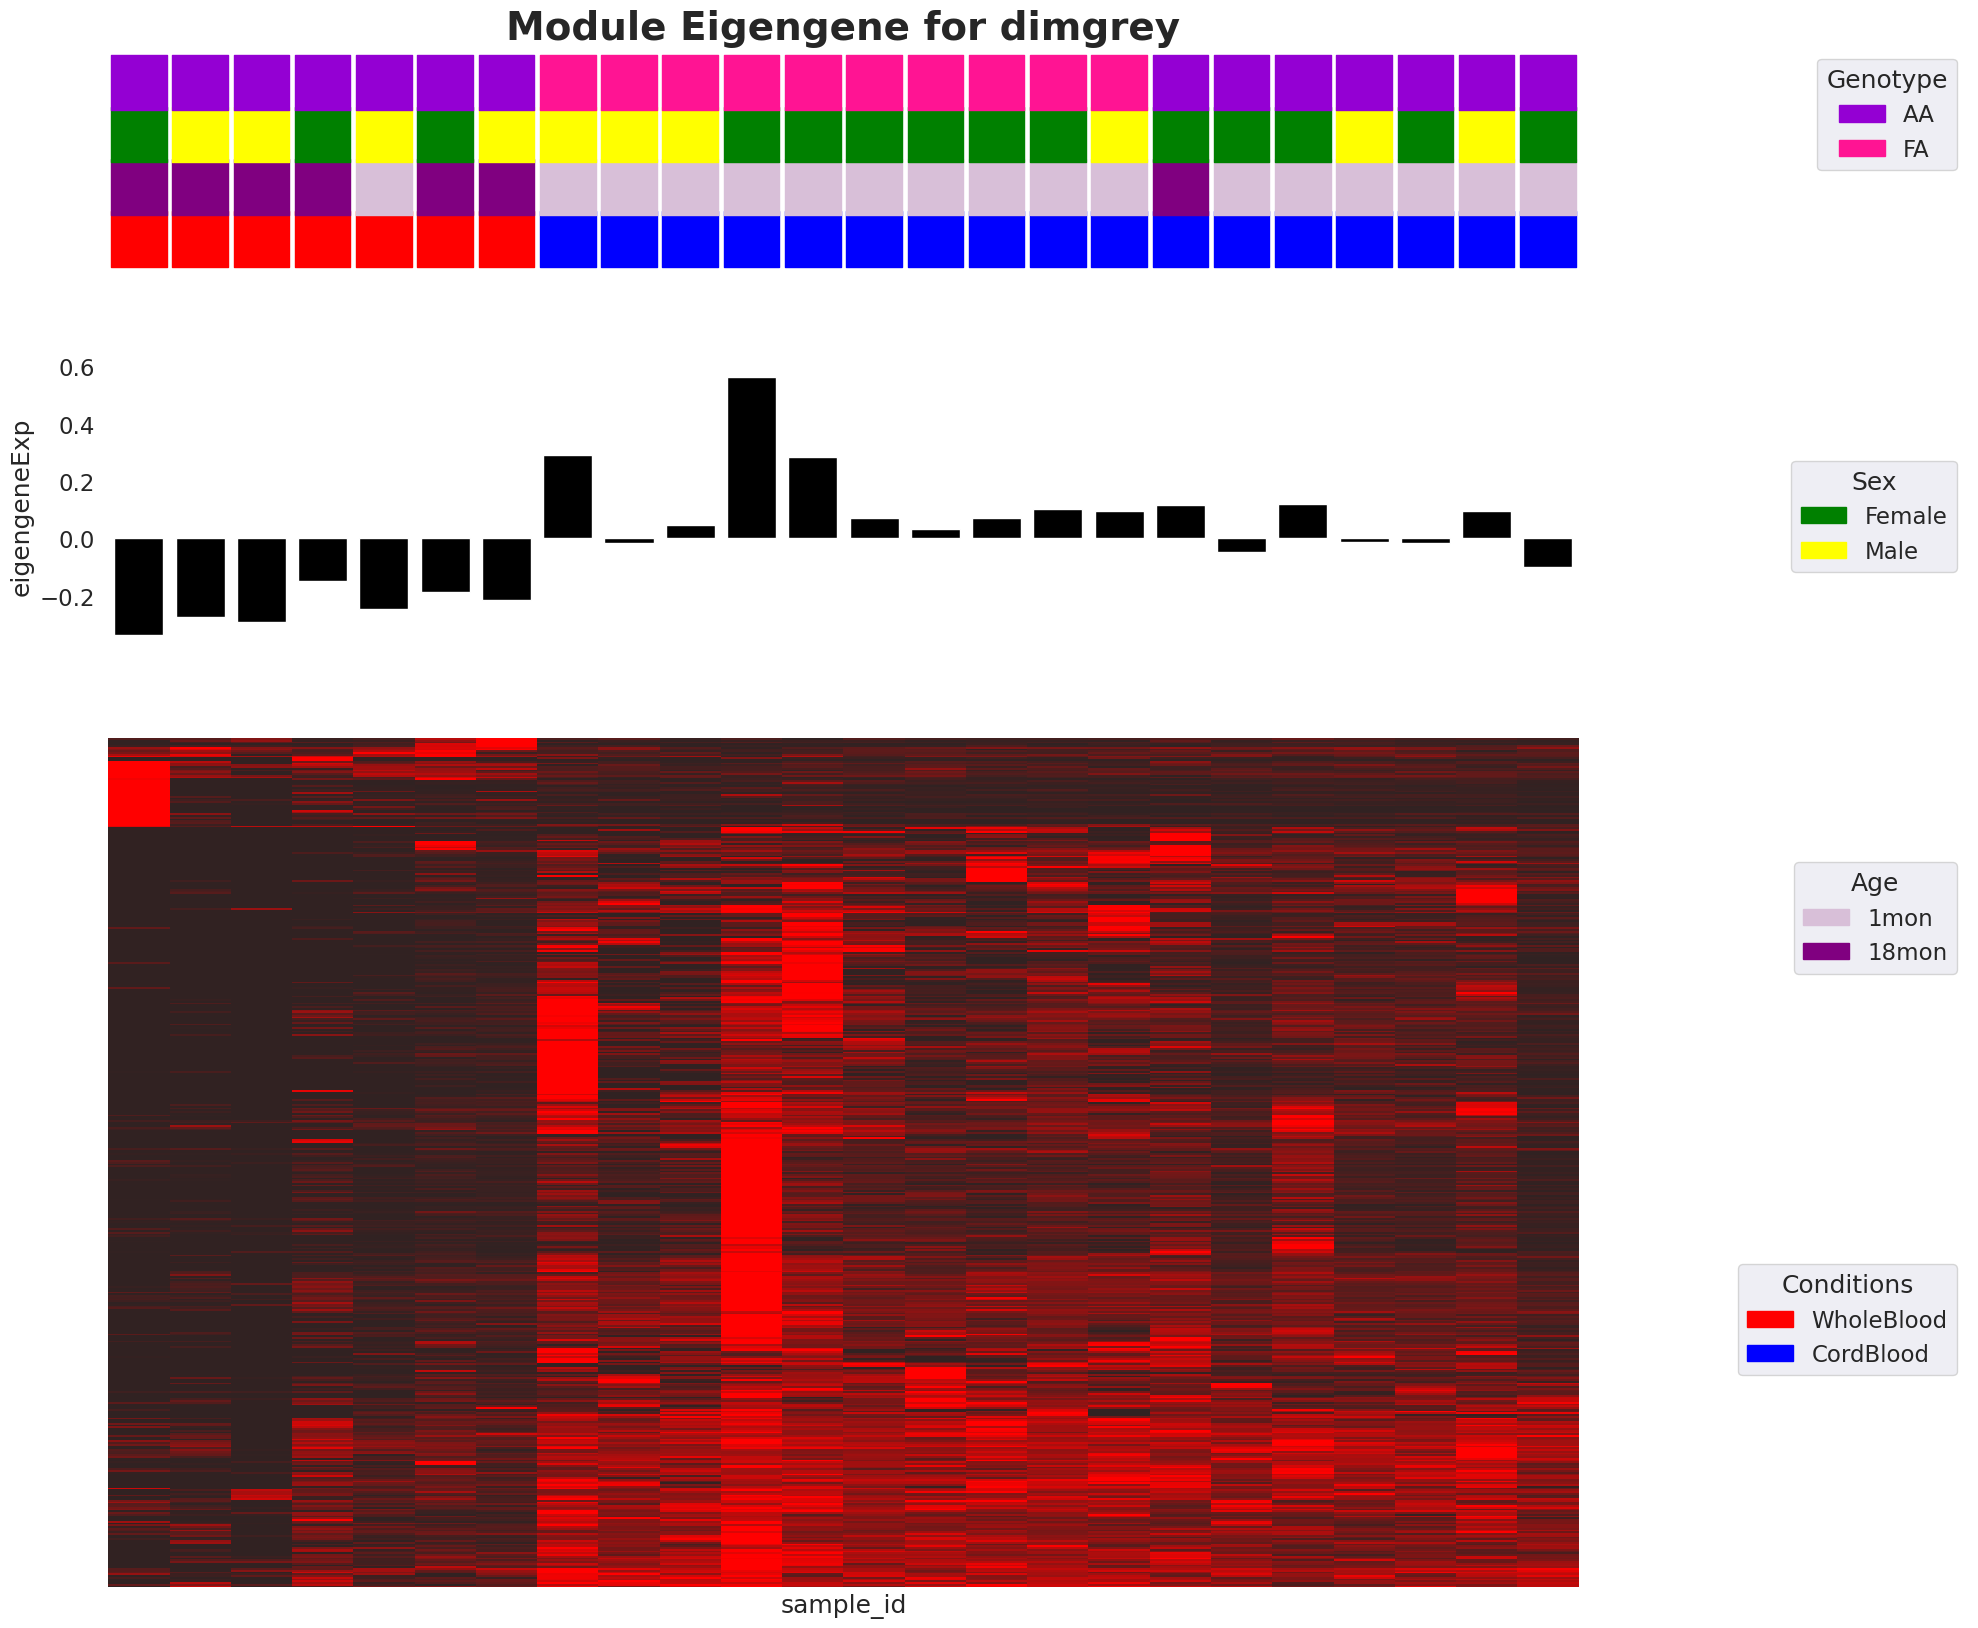

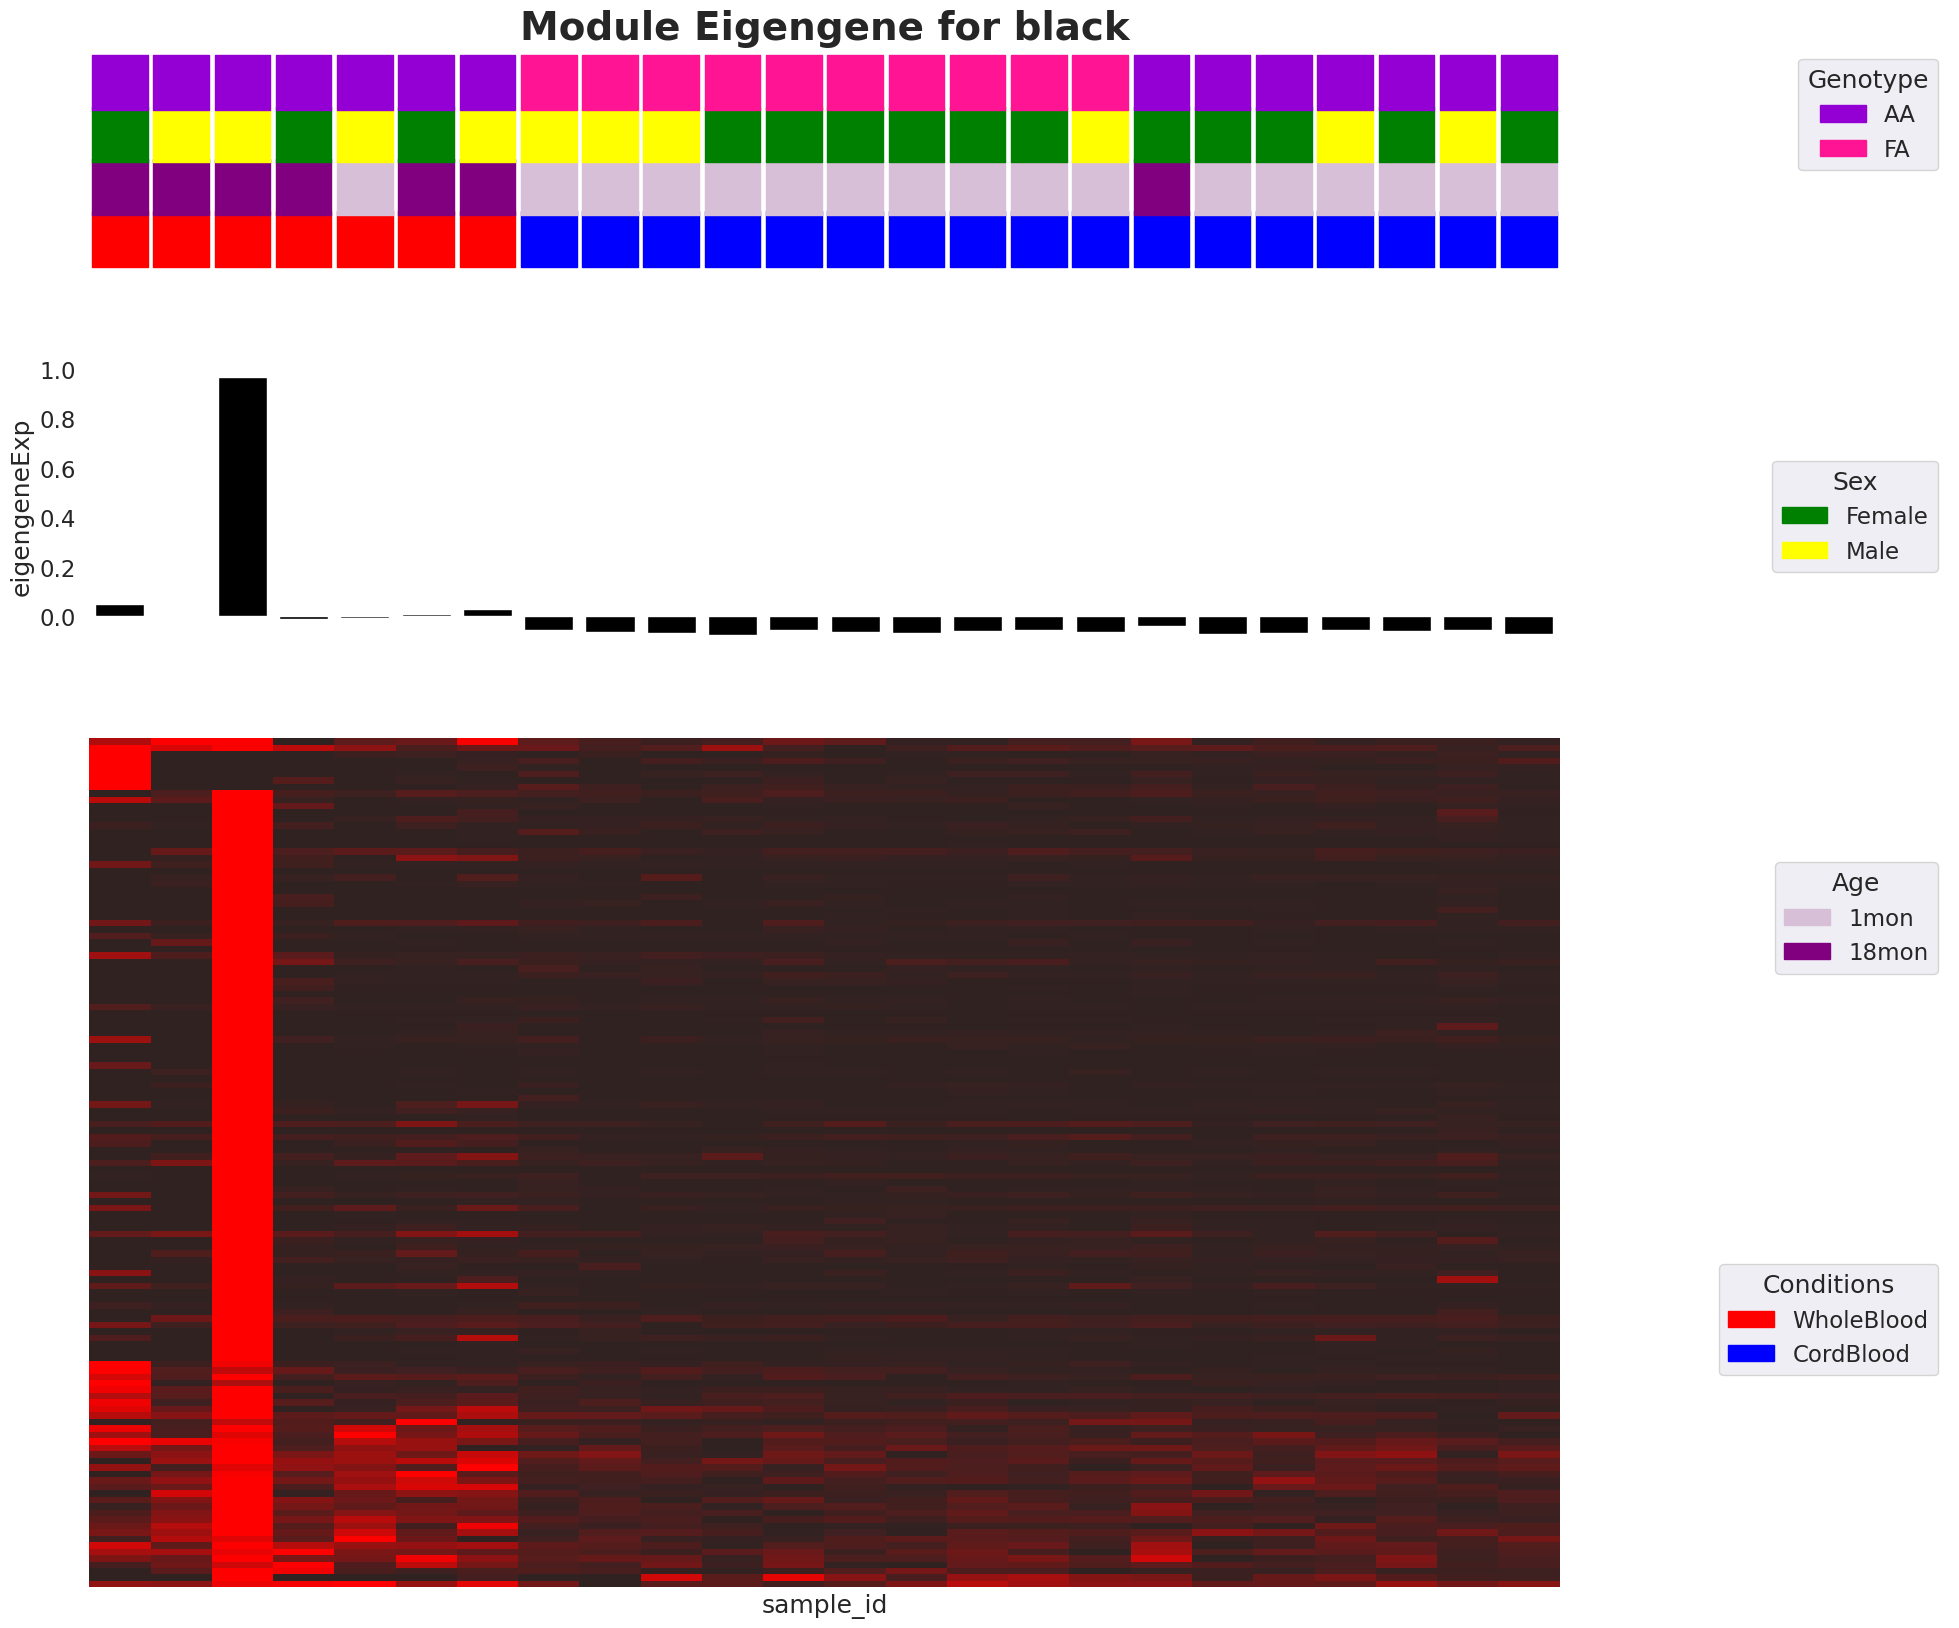

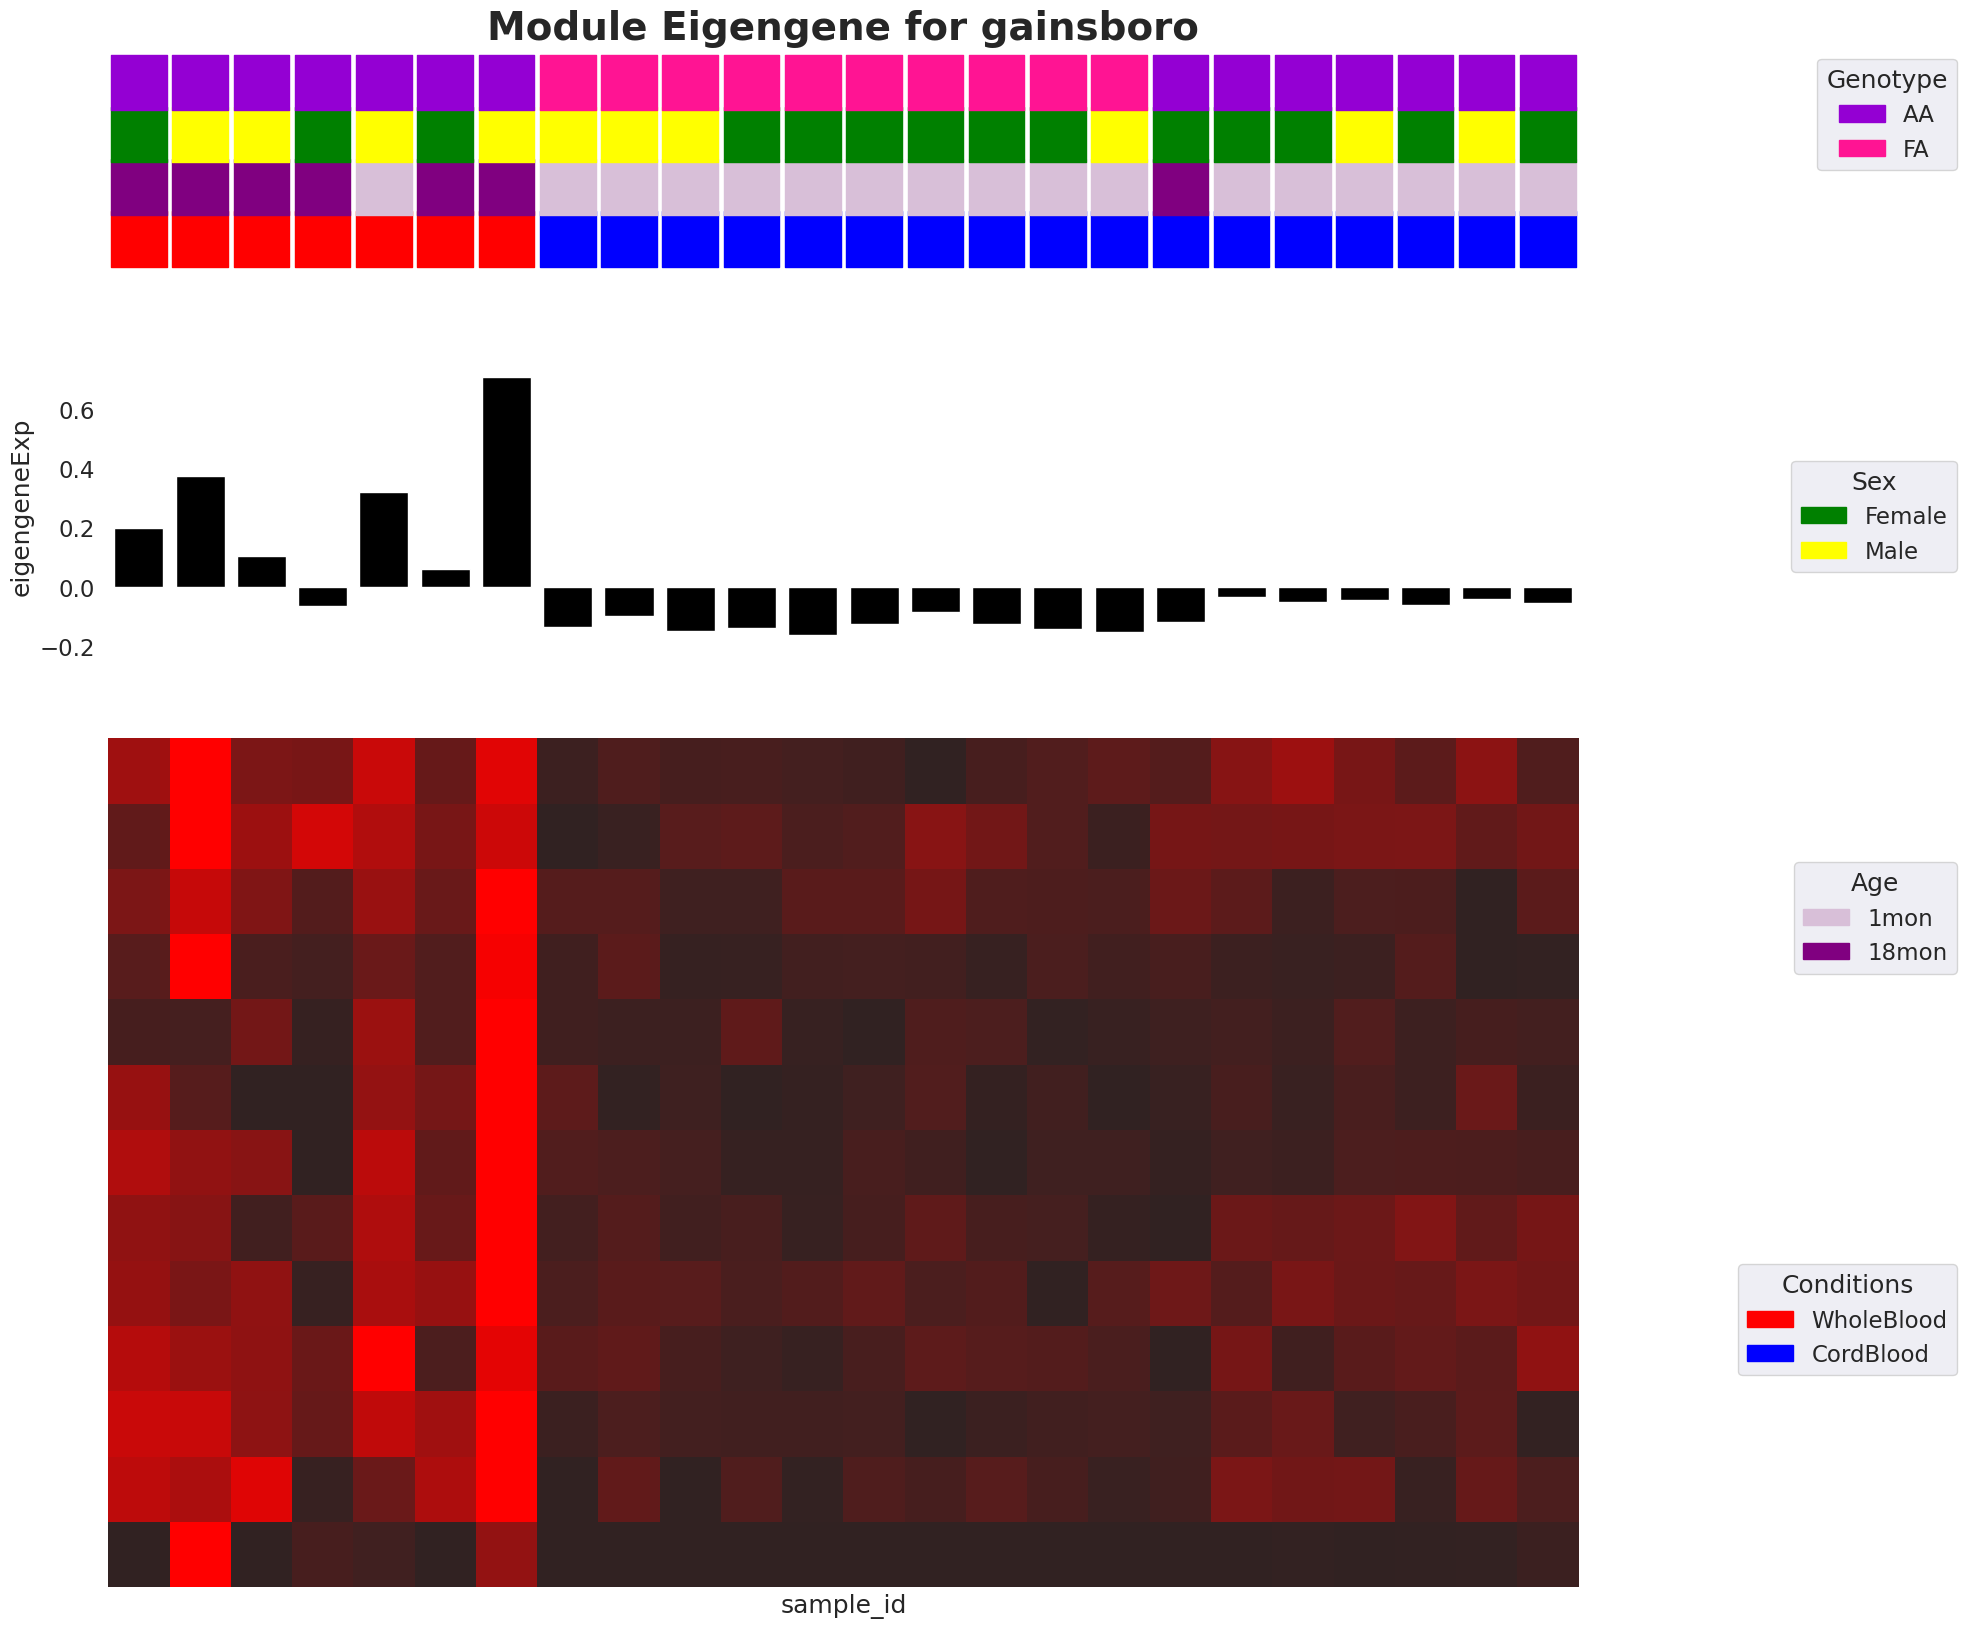

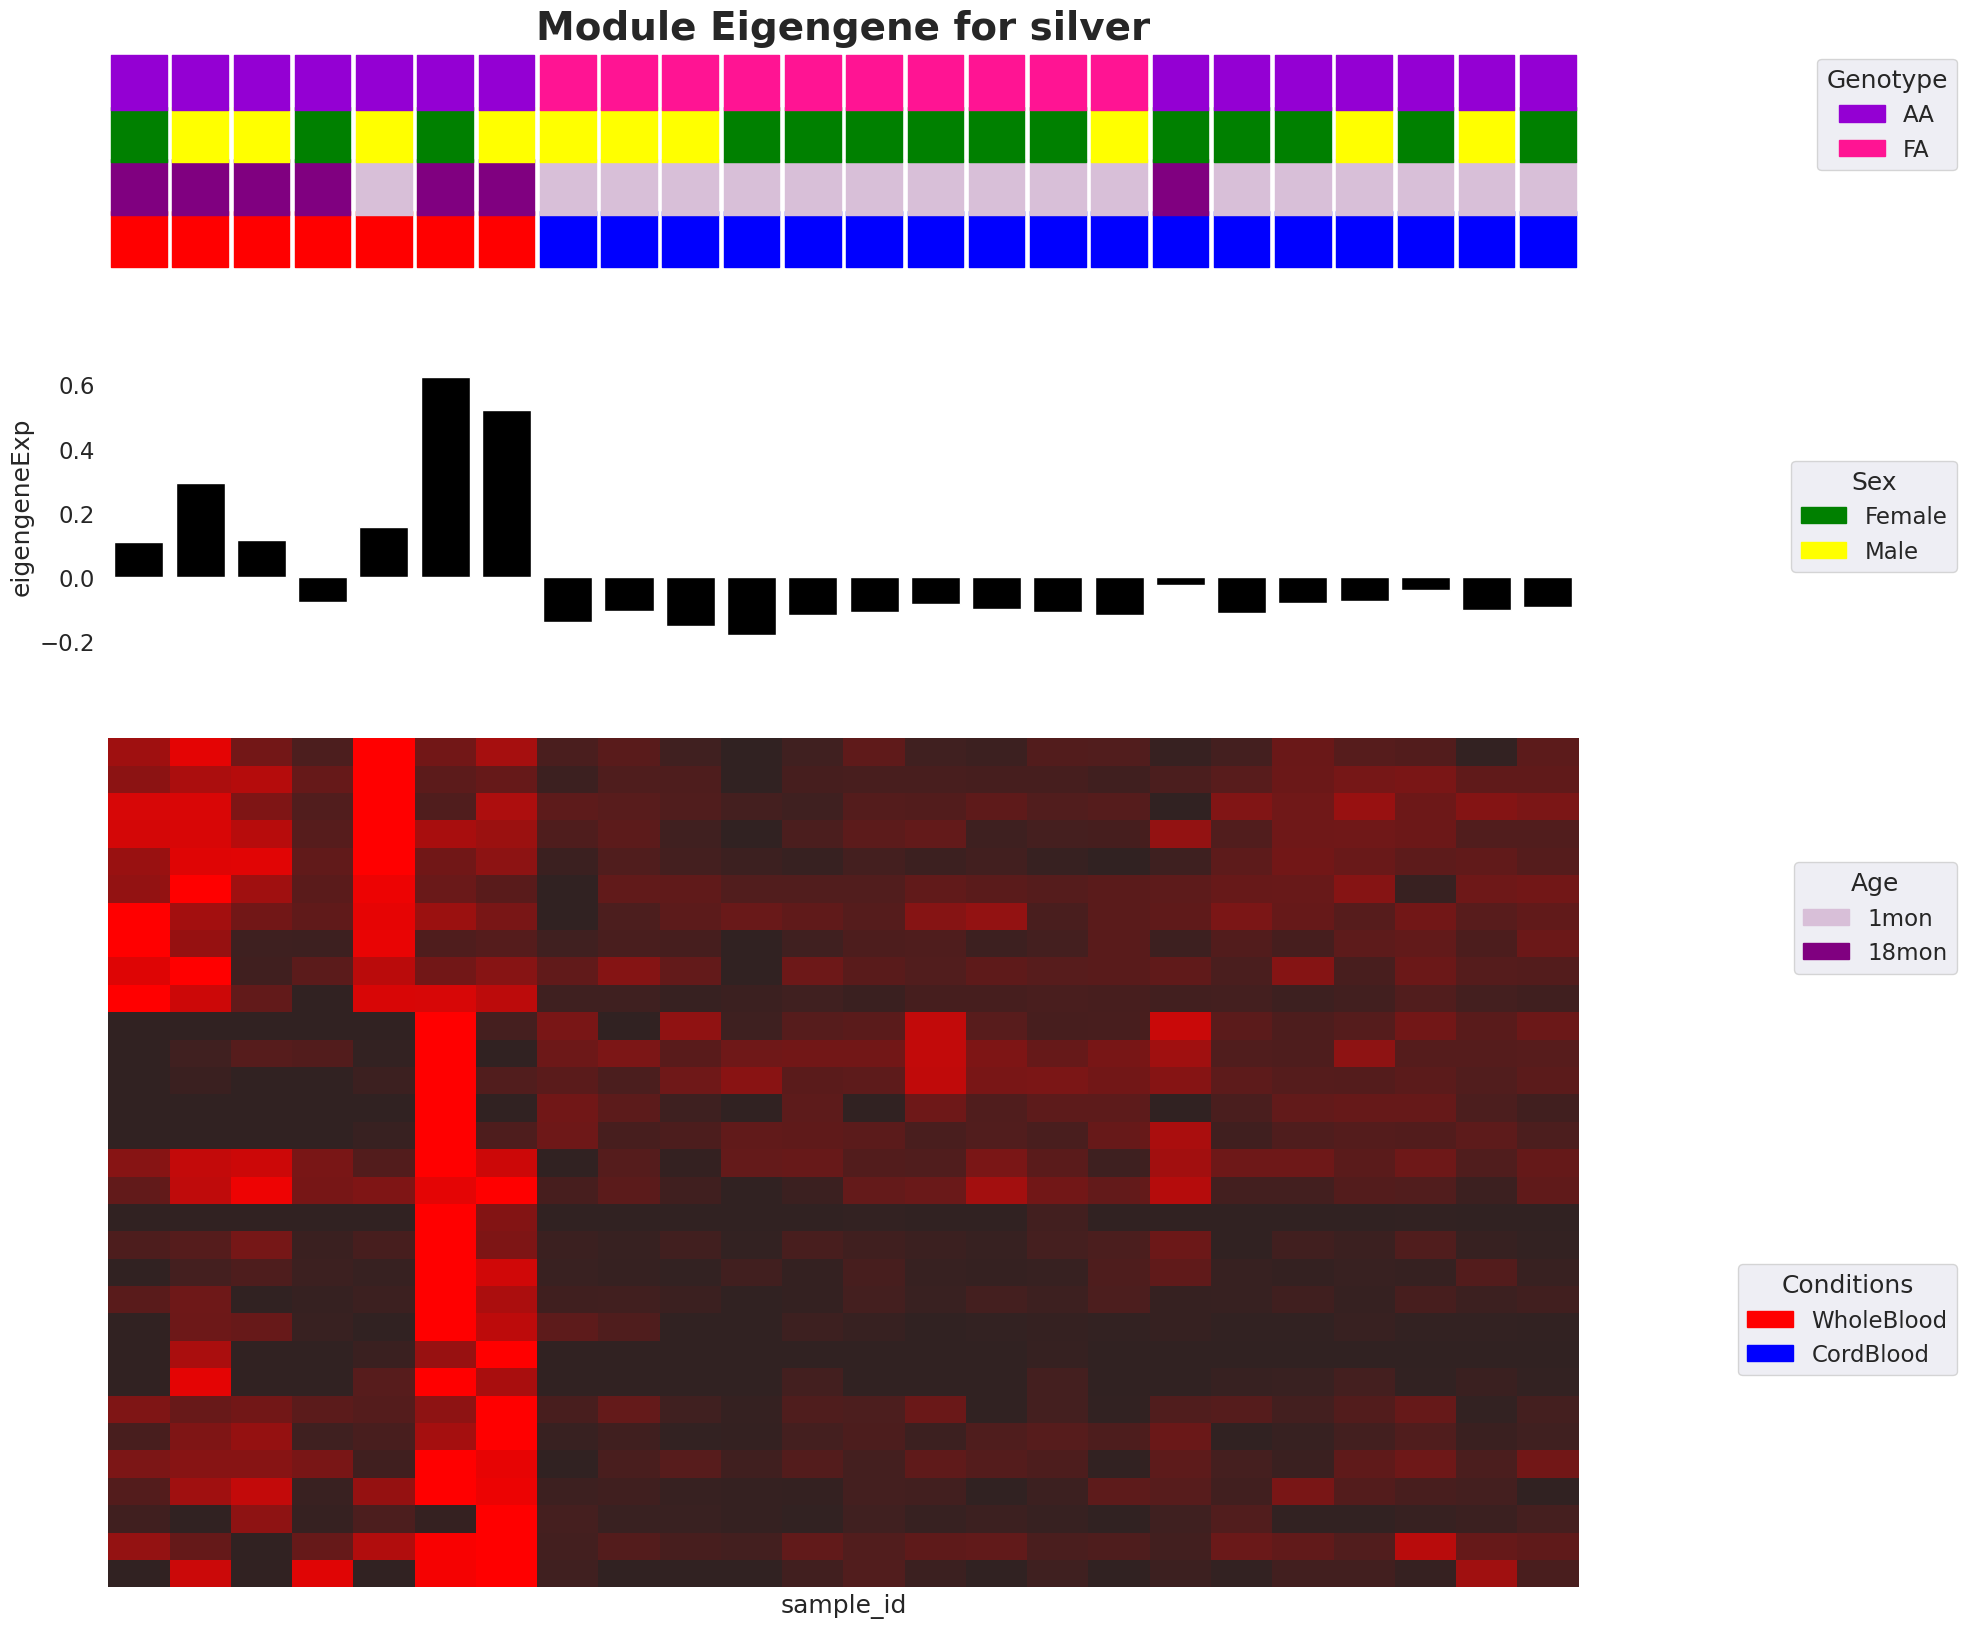

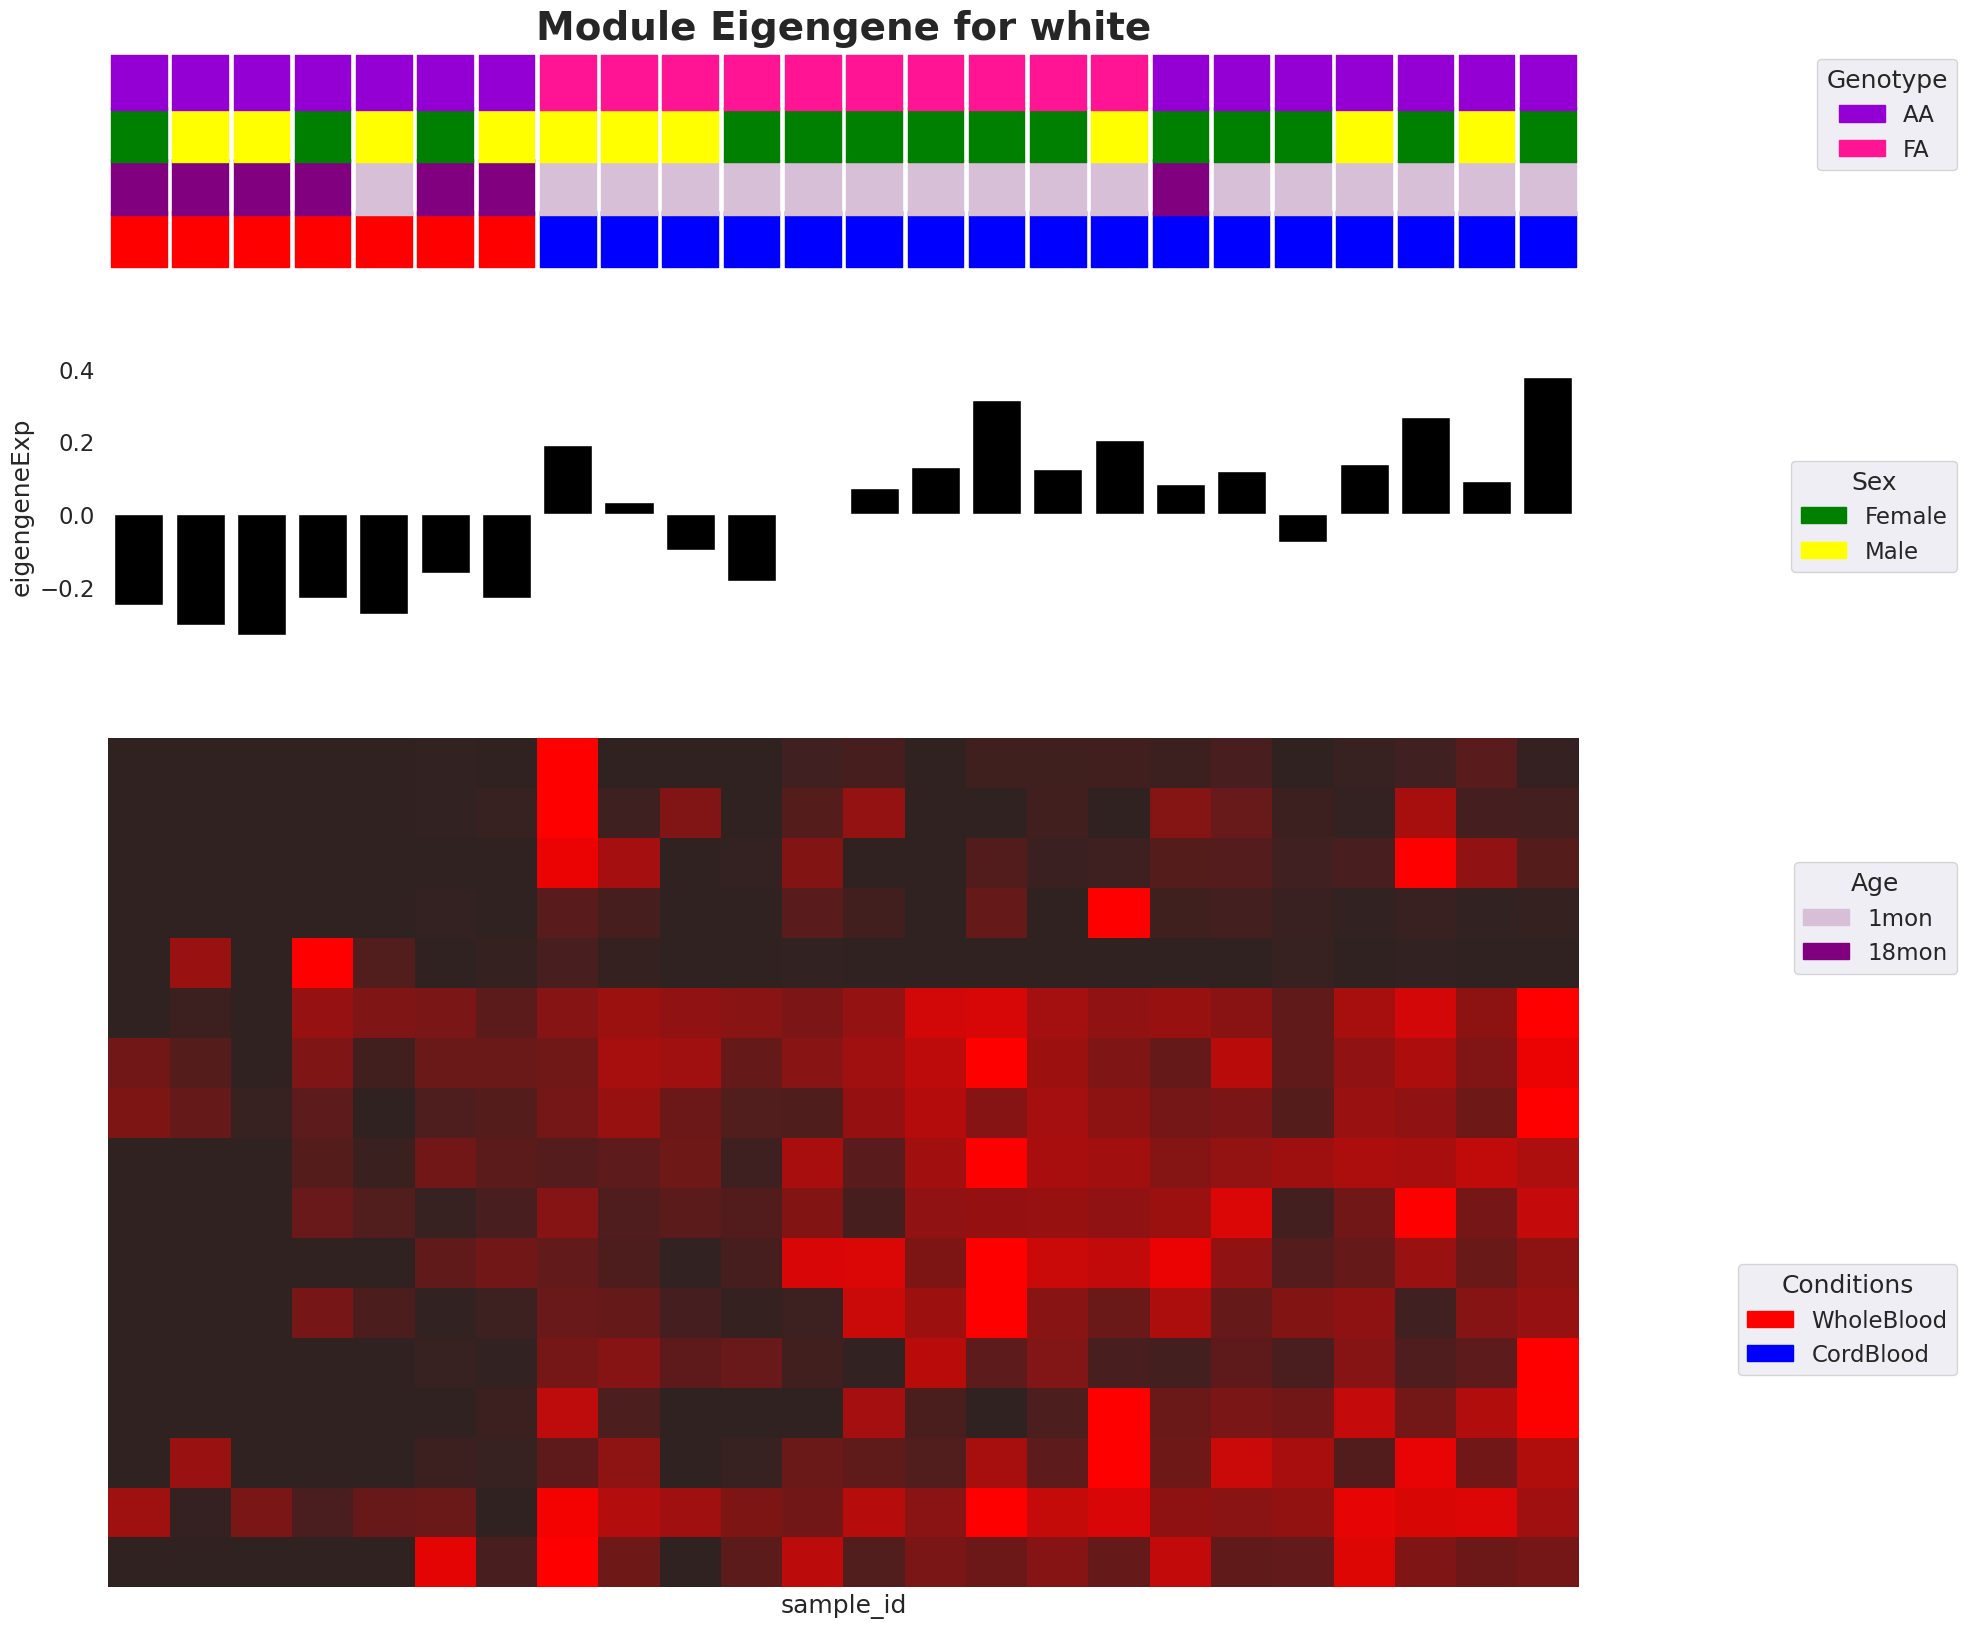

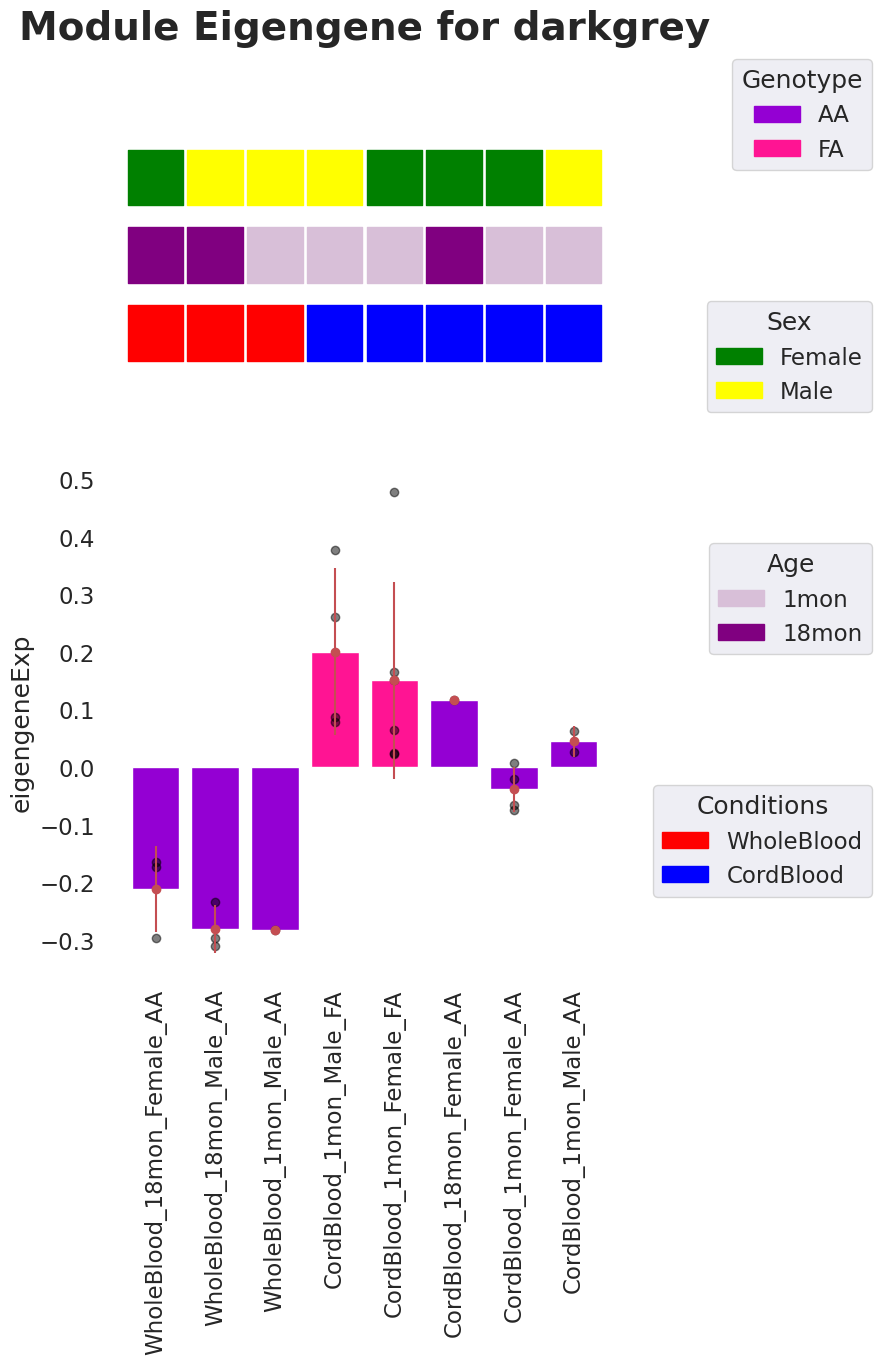

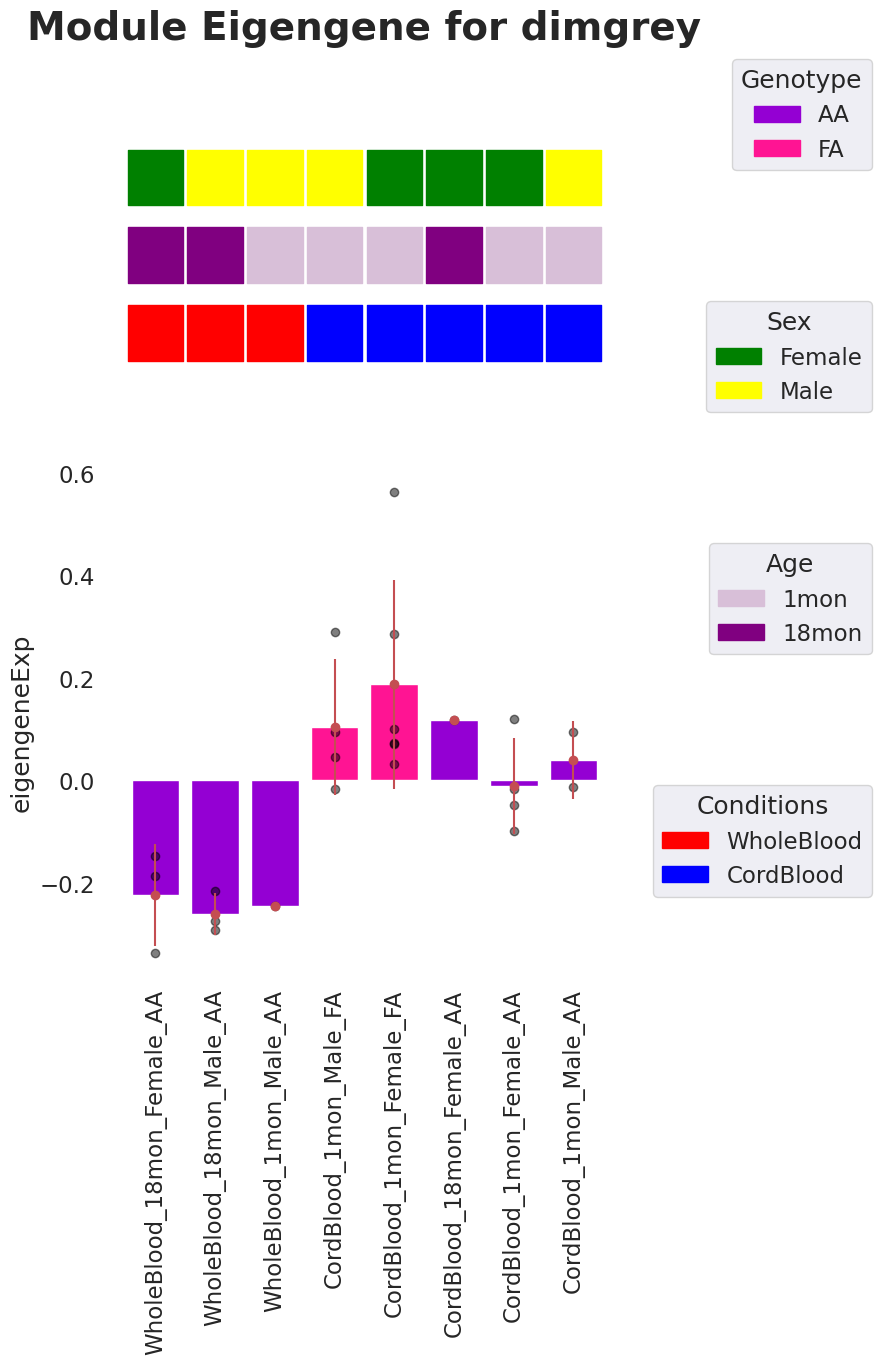

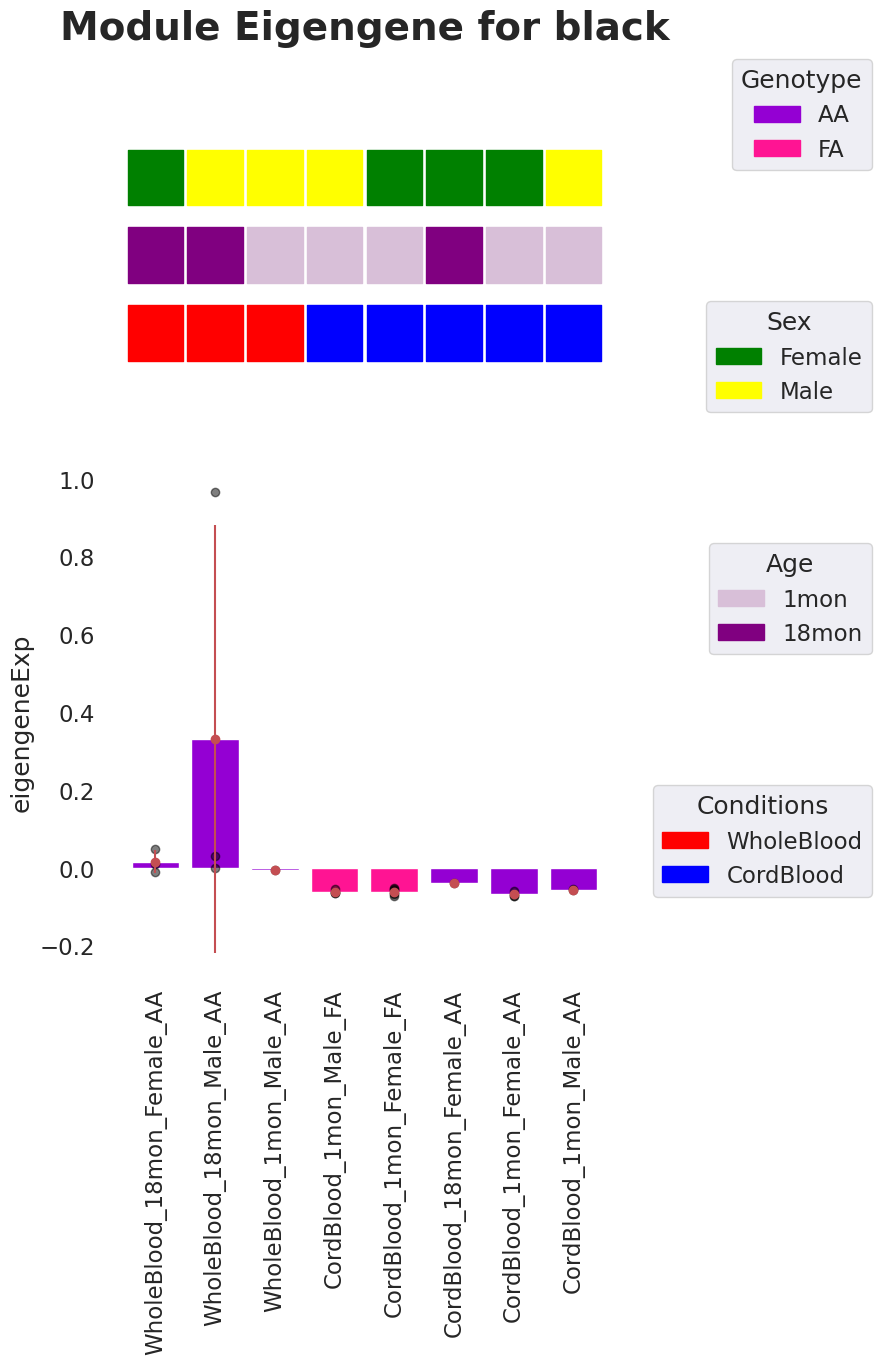

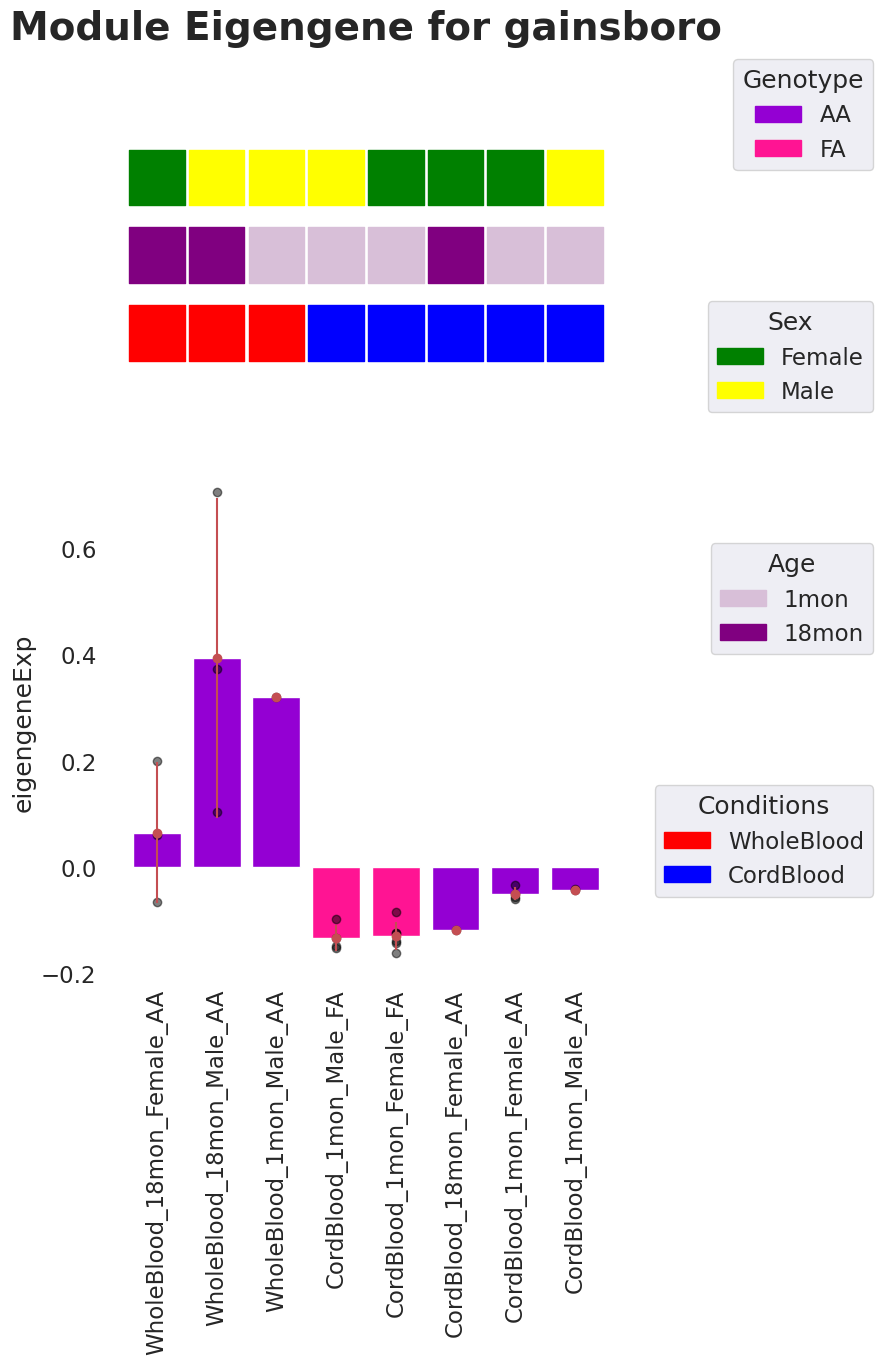

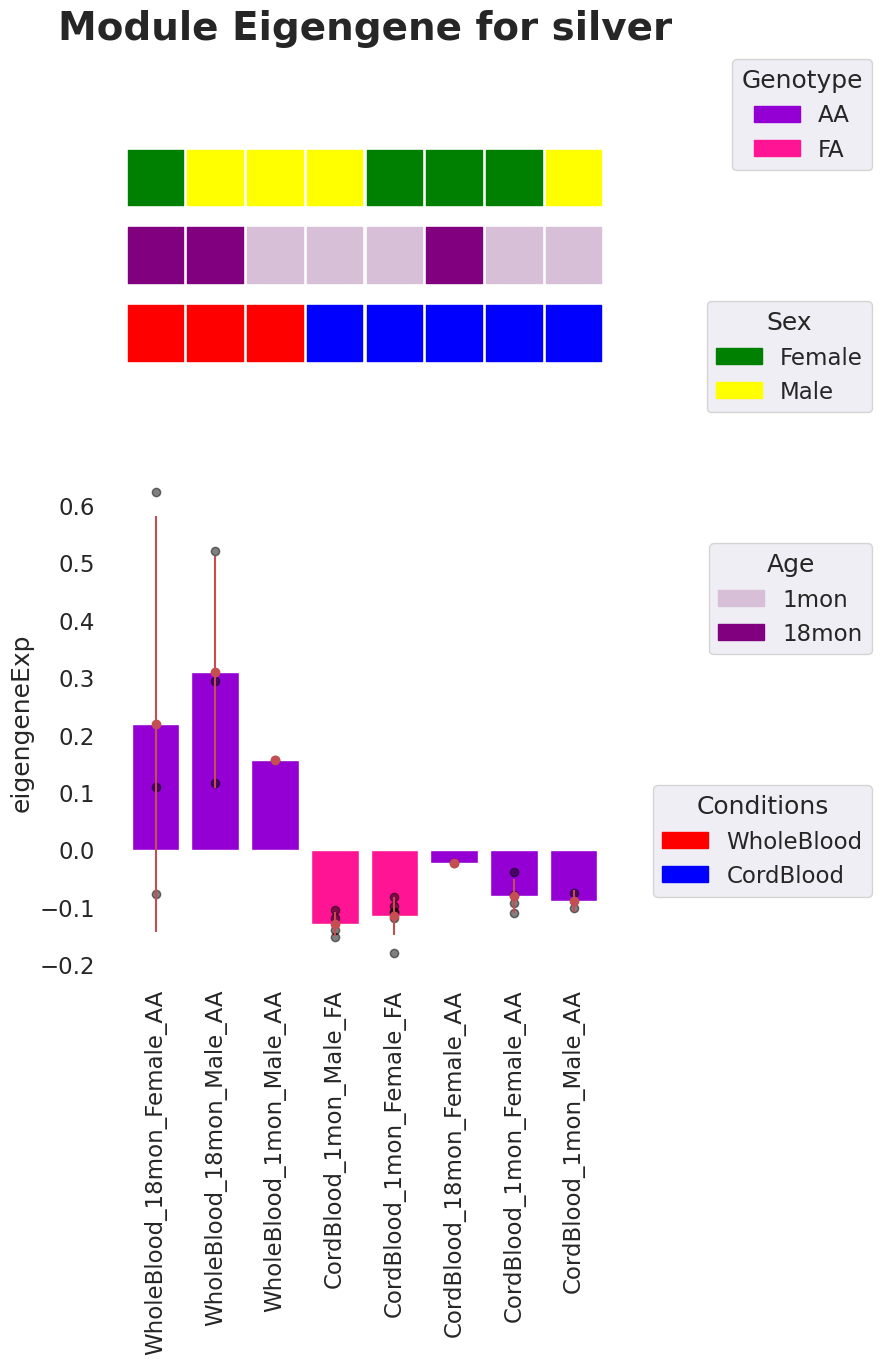

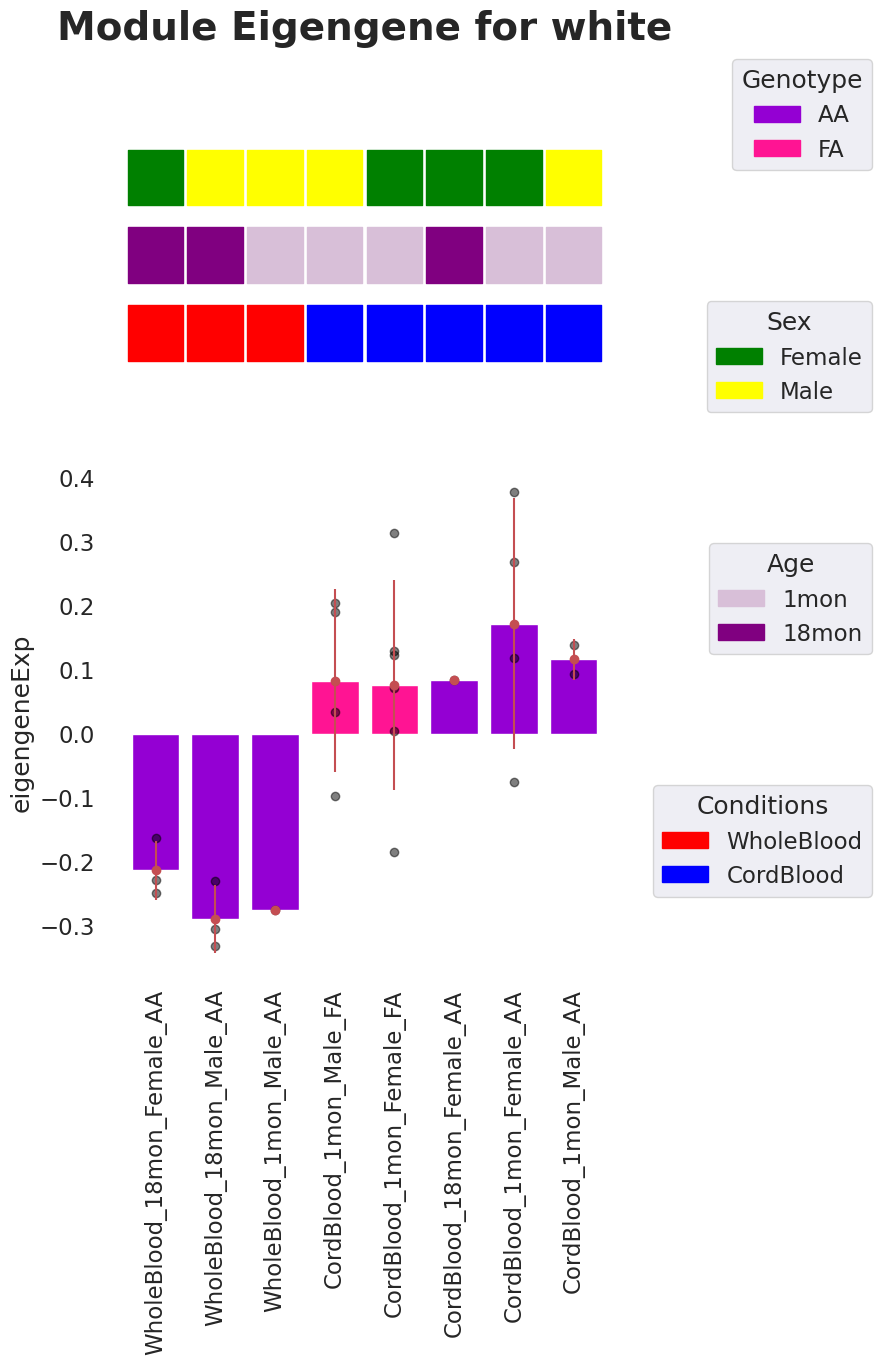

In [6]:
pyWGCNA_SCD.analyseWGCNA()

## Saving and loading your PyWGCNA
You can save or load your PyWGCNA object with the `saveWGCNA()` or `readWGCNA()` functions respectively.

In [7]:
pyWGCNA_SCD.saveWGCNA()

Saving WGCNA as SCD.p


you can also load your PyWGCNA object with `readWGCNA()` function. you can download `5xFAD.p` from [Zendo](https://zenodo.org/record/6672453#.YrDS4LnMJhE).

In [8]:
import PyWGCNA
pyWGCNA_SCD = PyWGCNA.readWGCNA("SCD.p")

Reading SCD WGCNA done!


## Finding hub genes for each modules

you can also ask about hub genes in each modules based on their connectivity by using `top_n_hub_genes()` function.

It will give you dataframe sorted by connectivity with additional gene information you have in your expression data.

In [9]:
pyWGCNA_SCD.top_n_hub_genes(moduleName="black", n=10)

calculating adjacency matrix ...
	Done..



,connectivity,dynamicColors,moduleColors,moduleLabels,gene_name,gene_biotype
ENSG00000205560,78.804220,black,black,0.0,CPT1B,protein_coding
ENSG00000175471,78.739239,black,black,0.0,MCTP1,protein_coding
ENSG00000116117,78.726357,black,black,0.0,PARD3B,protein_coding
ENSG00000184224,78.726357,black,black,0.0,NDUFV1-DT,lncRNA
ENSG00000268940,78.726357,black,black,0.0,CT45A1,protein_coding
ENSG00000217716,78.726357,black,black,0.0,RPS10P3,processed_pseudogene
ENSG00000235649,78.726357,black,black,0.0,MXRA5Y,unprocessed_pseudogene
ENSG00000137869,78.726357,black,black,0.0,CYP19A1,protein_coding
ENSG00000228217,78.726357,black,black,0.0,PNRC2P1,processed_pseudogene
ENSG00000285549,78.694015,black,black,0.0,,lncRNA


In [10]:
pyWGCNA_SCD.getModuleName()

['black', 'darkgrey', 'dimgrey', 'gainsboro', 'silver', 'white']

Network directory does not exist!
Creating network directory!


TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [ ]:
print(f"Raw expresion data along with information:\n {pyWGCNA_SCD.geneExpr}")

In [12]:
print(f"Raw gene inforamtions:")
pyWGCNA_SCD.geneExpr.var.head(5)

Raw gene inforamtions:


,gene_name,gene_biotype
ENSG00000001167,NFYA,protein_coding
ENSG00000001630,CYP51A1,protein_coding
ENSG00000003400,CASP10,protein_coding
ENSG00000005238,ATOSB,protein_coding
ENSG00000005812,FBXL3,protein_coding
